<center><h1 style="font-family:'Consolas'">In the name of Allah</h1></center>


<font color='#4fdb18'><h2>Tennis - Overview</h2></font>


**<h3>Abstract</h3>**
Tennis is a sport played among two players or two pairs of players competing with each other in a rectangular tennis court with fixed boundaries.
Tennis is believed to have originated during 12th or 13th century in France. However, it was played by Major Walter C. Wingfield, in an hourglass shaped court in 1873 in Great Britain.
The two sides of the court are separated with a net. The sport involves shooting a tennis ball towards the other side of the court with a tennis racket. The ball has to fall within the court boundaries. Players gain a point when the opposite team or player fails to deliver the ball to the opponent.
Tennis tests players in delivering the ball in the intended direction and in defending the ball delivered by their opponent.

**<h3>Manner of play</h3>**
<h4>Court</h4>
Tennis is played on a rectangular, flat surface. The court is 78 feet (23.77 m) long, and 27 feet (8.2 m) wide for singles matches and 36 ft (11 m) for doubles matches. A net is stretched across the full width of the court, parallel with the baselines, dividing it into two equal ends. The net is 3 feet 6 inches (1.07 m) high at the posts and 3 feet (0.91 m) high in the centre.

<center>

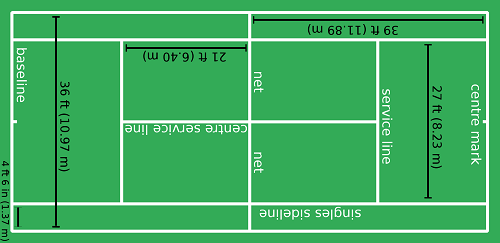

</center>

**<h3>Play of a single point</h3>**
The players or teams start on opposite sides of the net. One player is designated the server, and the opposing player is the receiver. The choice to be server or receiver in the first game and the choice of ends is decided by a coin toss before the warm-up starts. Service alternates game by game between the two players or teams. For each point, the server starts behind the baseline, between the centre mark and the sideline. The receiver may start anywhere on their side of the net. When the receiver is ready, the server will serve, although the receiver must play to the pace of the server.

**<h3>Scoring</h3>**
<h4>Game</h4>
A game consists of a sequence of points played with the same player serving. A game is won by the first player to have won at least four points in total and at least two points more than the opponent. The running score of each game is described in a manner peculiar to tennis: scores from zero to three points are described as "love", "15", "30", and "40", respectively. If at least three points have been scored by each player, making the player's scores equal at 40 apiece, the score is not called out as "40–40", but rather as "deuce". If at least three points have been scored by each side and a player has one more point than his opponent, the score of the game is "advantage" for the player in the lead.

<h4>Set</h4>
A set consists of a sequence of games played with service alternating between games, ending when the count of games won meets certain criteria. Typically, a player wins a set by winning at least six games and at least two games more than the opponent. If one player has won six games and the opponent five, an additional game is played. If the leading player wins that game, the player wins the set 7–5. If the trailing player wins the game (tying the set 6–6) a tiebreak is played. A tiebreak, played under a separate set of rules, allows one player to win one more game and thus the set, to give a final set score of 7–6. A tiebreak game can be won by scoring at least seven points and at least two points more than the opponent.

<h4>Match</h4>
A match consists of a sequence of sets. The outcome is determined through a best of three or five sets system. On the professional circuit, men play best-of-five-set matches at all four Grand Slam tournaments, Davis Cup, and the final of the Olympic Games and best-of-three-set matches at all other tournaments, while women play best-of-three-set matches at all tournaments. The first player to win two sets in a best-of-three, or three sets in a best-of-five, wins the match.

**<h3>Tournaments</h3>**
Tournaments are often organized by gender and number of players. Common tournament configurations include men's singles, women's singles, and doubles, where two players play on each side of the net. Tournaments may be organized for specific age groups, with upper age limits for youth and lower age limits for senior players.Most large tournaments seed players, but players may also be matched by their skill level

------------------------------------------------------------------------------------------------------------------------------------------

Import the required tools

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In order for the `read_parquet` function to work properly, the following package must be installed:

_pip install pyarrow_

Define a function to specify the names of the tables in each directory

In [3]:
import re


def get_file_names(directory: str) -> set[str]:
    """Get unique file names in each directory.

    Args:
        directory (str): The path where the files are located.

    Returns:
        set[str]: Unique names of files.
    """
    return {str.join('_', re.findall('[a-zA-Z]+', file.stem)) for file in list(Path.glob(Path(directory), '*.parquet'))}

Define a function to load tables

In [3]:
def load_dataframe(main_path: str, filename: str) -> pd.DataFrame:
    """Load parquet files as a dataframe

    Args:
        main_path (str): The address of the directory where the relevant files are located.
        filename (str): The name of the file or its pattern.

    Returns:
        pd.DataFrame: Dataframe from the given file.
    """
    path = Path(main_path)
    files = [str(file) for file in list(path.glob(filename))]
    df = pd.concat([pd.read_parquet(file)
                   for file in files], ignore_index=True)
    return df

<font color='yellow'><h2>Data Cleaning</h2></font>

The most basic and most important step in data analysis is `Data Cleaning`, which is specifically addressed in this section. To do this, first, the tables used in the analysis must be specified. The tables used for the analysis are summarized below:
<ul>
    <b><li>MatchAwayTeamInfo & MatchHomeTeamInfo</li></b>
    <b><li>MatchEventInfo</li></b>
    <b><li>PeriodInfo</li></b>
    <b><li>MatchVenueInfo</li></b>
    <b><li>MatchTimeInfo</li></b>
    <b><li>MatchTournamentInfo</li></b>
    <b><li>MatchAwayScoreInfo & MatchHomeScoreInfo</li></b>
    <b><li>PowerInfo</li></b>
</ul>

In the next step, the columns of the tables that are needed for analysis should be specified and the number of null data should be considered. If the number of missing data is small, deleting them can be a viable option. However, if a significant portion of an important column is comprised of missing data, deleting them would harm the corresponding table as a large portion of data would be lost. Therefore, considering only one column and deciding to delete data based on that can result in losing a lot of data.

For example, in the `MatchAwayTeamInfo` and `MatchHomeTeamInfo` tables, some columns such as `turned_pro`, `plays`, `weight` and `height` are very important and are used in the analysis. If the null data in these columns is deleted, a large part of the data will be lost and it will greatly affect other columns such as `current_rank`, which is used in another analysis. On the other hand, the presence of null data in some columns such as `turned_pro` can be meaningful. In fact, null values in this column can indicate that the player concerned is an amateur and has not yet become a professional.

In the `MatchEventInfo` table, there are three important columns named `winner_code`, `start_datetime` and `match_slug`, which are used in the analysis. Among these columns, only `winner_code` contains null data, which constitutes a small percentage of the total data in the table (less than 1%). Therefore, removing null data from this column can be logical. In the `MatchVenueInfo` table, only the `country` column contains null data, which can be deleted without much change in the mentioned table. When the `MatchTimeInfo` table is examined, it can be seen that only about half of the data for columns `period_1` to `period_5` contain non-null values. Perhaps the best way to deal with this table is to delete rows where all values in columns `period_1` to `period_5` contain null data. In other words, only rows with at least one non-null value are left. The only column that is used in the `MatchTournamentInfo` table and contains null data is `ground_type`. These null values constitute about 2% of the total data in this table, therefore, removing these data is a suitable approach. The presence of null variables in the `period_1_tie_break` to `period_5_tie_break` columns in `MatchAwayScoreInfo` and `MatchHomeScoreInfo` tables seems reasonable because tie breaks may not happen in any match. On the other hand, because only a small part of the rows in these columns are made up of non-null data, it is not correct to delete them. Therefore, the best way to perform data cleaning in this analysis is to remove or replace null data with appropriate values in each question according to the columns used in each table.

<font color='yellow'><h2>Answers (Mandatory Questions)</h2></font>

<font color = 'cyan'>Q1: How many tennis players are included in the dataset?</font>

Load Data

In [ ]:
main_path = 'data/raw_match_parquet/'
away_df = load_dataframe(main_path, 'away_team_11*.parquet')
home_df = load_dataframe(main_path, 'home_team_11*.parquet')

Clean Data

In [27]:
away_players = away_df['player_id']
home_players = home_df['player_id']
home_away_df = pd.concat([away_players, home_players]).dropna()

Result

In [28]:
home_away_df.unique().size

596

According to the above result, there are 596 tennis players in this dataset.

<font color = '#00ffff'>Q2: How many years is each player a professional player?</font>

In [ ]:
# Load dataFrames
main_path = 'data/raw_match_parquet/'
away_df = load_dataframe(main_path, 'away_team_11*.parquet')
home_df = load_dataframe(main_path, 'home_team_11*.parquet')

**Hints:**
  * In this question, we use 'country', 'full_name', 'turned_pro', 'player_id' columns from ["MatchAwayTeamInfo" , "MatchHomeTeamInfo] tables and also, we received the current date and separated the year from the date and got it from the difference 'turned_pro' column

**Data Cleaning:**
  * In this step, we clear the data that have null values

In [19]:
# Concatenate 'away_df' and 'home_df' DataFrames
concat_away_home = pd.concat([away_df,home_df], ignore_index=True)
# Drop duplicates
concat_away_home = concat_away_home[['country','full_name', 'turned_pro','player_id']].drop_duplicates()
# Drop null values
concat_away_home =  concat_away_home.dropna()

     country                     full_name  turned_pro  player_id
624  Moldova           Cozbinov, Alexander           5     107351
25     Spain  Davidovich Fokina, Alejandro           5     157456
20     Italy              Musetti, Lorenzo           5     261015
428    China                   Wang, Xinyu           6     227431
164    Italy              Forti, Francesco           6     217834
..       ...                           ...         ...        ...
14    France             Mannarino, Adrian          20      15894
734   Turkey                  Özgen, Pemra          20      20347
420  Belarus            Azarenka, Victoria          21      19017
393   France              Gasquet, Richard          22      14414
42    Russia               Zvonareva, Vera          24      18298

[106 rows x 4 columns]


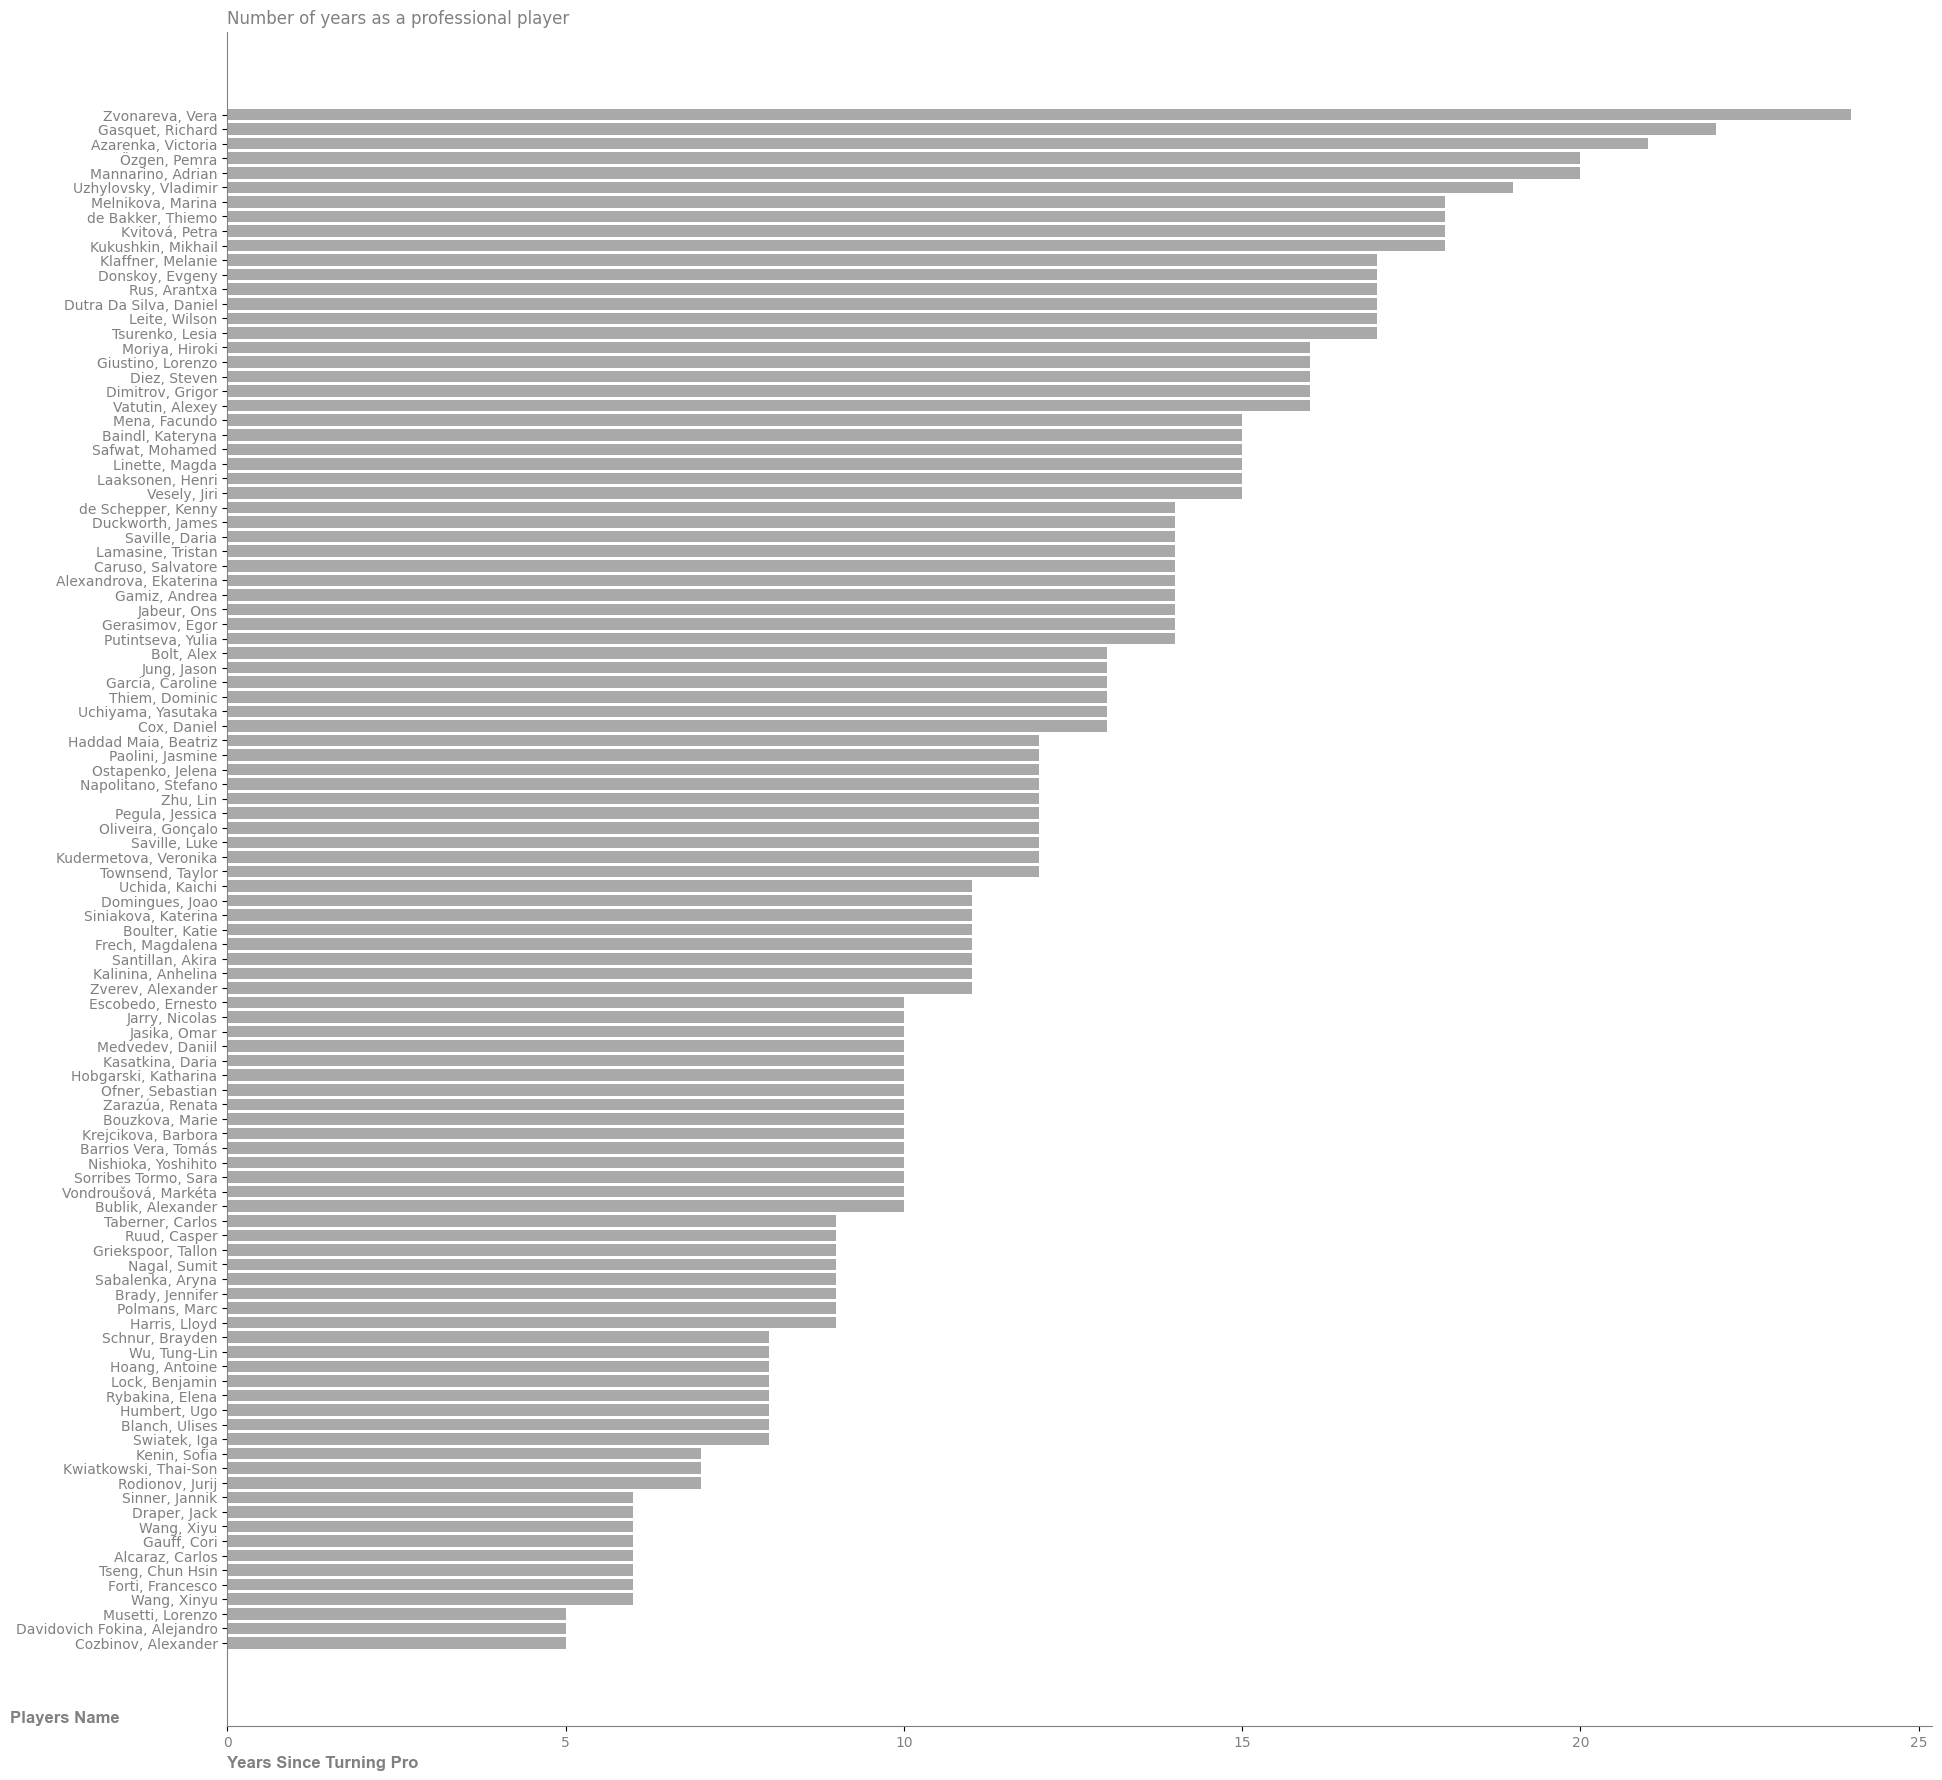

In [20]:

# Get the current date and extract the year
get_date = pd.Timestamp.now()
get_date_df = pd.DataFrame({'date': [get_date.date()]})
get_date_df['date'] = pd.to_datetime(get_date_df['date'])
get_date_df['year'] = get_date_df['date'].dt.year

# Convert 'turned_pro' column to int64 and calculate the difference with the current year
concat_away_home['turned_pro'] = concat_away_home['turned_pro'].astype(np.int64)
concat_away_home['turned_pro'] = get_date_df['year'].values - concat_away_home['turned_pro']

# pro_player_away_home
concat_away_home = concat_away_home.sort_values('turned_pro')
print(concat_away_home)

# Bar plot
plt.figure(figsize=(22,22))
plt.barh(concat_away_home['full_name'], concat_away_home['turned_pro'], color='darkgray')
plt.xlabel('Years Since Turning Pro', loc='left',  color='gray', fontdict={'family': 'Arial', 'size':12, 'weight':'bold'})
plt.ylabel('Players Name', loc='bottom', rotation=360, color='gray', fontdict={'family': 'Arial', 'size':12, 'weight':'bold'})
plt.gca().spines[['bottom','left']].set_color('gray')
plt.gca().spines[['top','right']].set_visible(False)
plt.xticks(color='gray')
plt.yticks(color='gray')
plt.title('Number of years as a professional player', loc='left', color='gray')
plt.show()



- **Analyze:**
 * There are many players in this tournament, 106 of them are professionals. Zvonareva, Vera player with 24 years of professional experience has participated in this tournament from Russia. Also, Alexander from Moldova, Alejandro from Spain and Lorenzo from Italy have the least records as professional players with 5 years of professional playing experience.

<font color = 'cyan'>Q3: Which player has the highest number of wins ?</font>

In [ ]:
main_path = 'data/raw_match_parquet/'
away_df = load_dataframe(main_path, 'away_team_11*.parquet')
home_df = load_dataframe(main_path, 'home_team_11*.parquet')
event_df = load_dataframe(main_path, 'event_*.parquet')

In [55]:
new_event = event_df[['match_id', 'winner_code', 'match_slug']].copy()
new_event = new_event.dropna()

To solve this question, three tables have been used, the data of two tables is not null, but the column of the 'Matcheventinfo' table has null data, which constitutes about 1% of the total data, and since this percentage is small, we can perform the data cleaning operation. let's implement for this, we convert its data to null.

**Definition:**
  1. winner_code = 1 => home wins the games
  2. winner_code = 2 => away wins the games

  **Hints:**
  1. In this question, we use 'match_id','name' columns from ["MatchAwayTeamInfo" , "MatchHomeTeamInfo] tables and also 'match_id', 'winner_code', 'match_slug' columns from ["MatchEventInfo] table.

In [56]:
new_home = home_df[['match_id','name']].copy()
new_away = away_df[['match_id','name']].copy()


all_matches = pd.merge(new_home , new_away ,  on='match_id', suffixes=['_home' , '_away'])


new_event = event_df[['match_id', 'winner_code', 'match_slug']].copy()
all_matches = pd.merge(all_matches, new_event, on='match_id')

win_home_counts = all_matches[all_matches['winner_code'] == 1]['name_home'].value_counts()
win_away_counts = all_matches[all_matches['winner_code'] == 2]['name_away'].value_counts()

top_winner = pd.concat([all_matches[all_matches['winner_code'] == 1]['name_home'].value_counts(),all_matches[all_matches['winner_code'] == 2]['name_away'].value_counts() ]).idxmax()
top_winner

'Damm M.'

In [57]:
new_home = home_df[['match_id','name']].copy()
new_away = away_df[['match_id','name']].copy()


all_matches = pd.merge(new_home , new_away ,  on='match_id', suffixes=['_home' , '_away'])


new_event = event_df[['match_id', 'winner_code', 'match_slug']].copy()
all_matches = pd.merge(all_matches, new_event, on='match_id')

win_home_counts = all_matches[all_matches['winner_code'] == 1]['name_home'].value_counts()
win_away_counts = all_matches[all_matches['winner_code'] == 2]['name_away'].value_counts()

top_away_winner = win_away_counts.idxmax()
top_home_winner = win_home_counts.idxmax()

print("Top away winner is:",top_away_winner)
print("Top home winner is:",top_home_winner)

Top away winner is: Girard E.
Top home winner is: Damm M.


 - **Analyze:**
  * Our players consists of two parts, home team and away team. Girard E. has the highest number of wins among away team & Damm M. has the highest number of wins among home team.On the other hand, Damm's number of wins is more than Girard's, as a result, Damm has the most number of wins.

<font color = 'cyan'> Q4: What is the longest match recorded in terms of duration?</font>

Load Data

In [33]:
main_path = 'data/raw_match_parquet/'
time_df = load_dataframe(main_path, 'time_*.parquet')
tournament_df = load_dataframe(main_path, 'tournament_*.parquet')

Clean Data

In [32]:
new_time_df = time_df.loc[:, 'match_id':'period_5'].dropna(how='all')
tournament_df = tournament_df[['match_id', 'tournament_name', 'ground_type', 'tournament_category_slug']].dropna()

Result

,match_id,period_1,period_2,period_3,period_4,period_5,total_time (hr),tournament_name,ground_type,tournament_category_slug
0,11699235,3438,4379,5018,None,None,3.565278,"Lisbon, Portugal, Qualifying",Red clay,challenger
1,11697113,4280,3485,3358,None,None,3.089722,"Beijing, China",Hardcourt outdoor,wta
2,11699173,2875,3657,4528,None,None,3.072222,"Lujan, Singles Main, M-ITF-ARG-07A",Red clay,itf-men
3,11697108,3675,3706,3414,None,None,2.998611,"Beijing, China",Hardcourt outdoor,wta
4,11675448,1995,3777,4878,None,None,2.958333,"Beijing, China",Hardcourt outdoor,atp


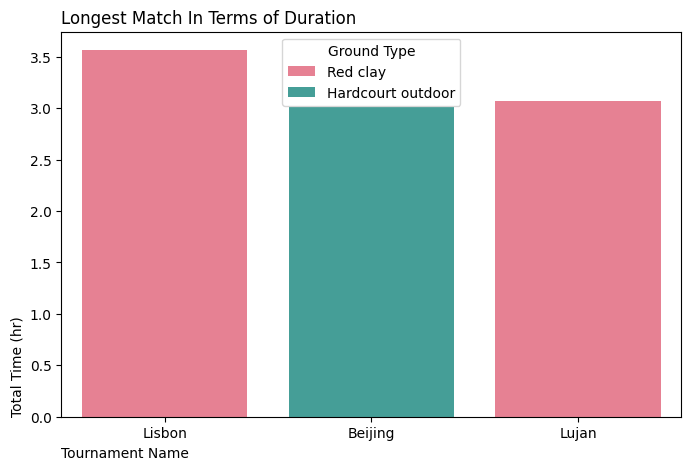

In [34]:
# new_time_df = time_df.loc[:, 'match_id':'period_5'].copy()
new_time_df['total_time (hr)'] = new_time_df.loc[:,
                                                 'period_1':'period_5'].sum(axis=1) / (60*60)
new_time_df = new_time_df.sort_values('total_time (hr)', ascending=False)
time_match_df = pd.merge(new_time_df, tournament_df[['match_id', 'tournament_name',
         'ground_type', 'tournament_category_slug']], on='match_id').head(5)


plt.figure(figsize=(8,5))
sns.barplot(x=time_match_df['tournament_name'].str.split(',').str[0]\
            , y=time_match_df['total_time (hr)'],palette='husl',hue=time_match_df['ground_type'],errorbar=None)\
                .set_title('Longest Match In Terms of Duration',loc='left')
ax = plt.gca()
ax.set_xlabel('Tournament Name',loc='left')
ax.set_ylabel('Total Time (hr)',loc='bottom');
plt.legend(title="Ground Type")
time_match_df

The result shows that the longest tennis match played in **three sets** lasted about **3.5 hours**. This match was played in **Lisbon (Portugal)** and on the **Red clay** field.

<font color = 'cyan'>Q5: How many sets are typically played in a tennis match?</font>

According to two tables <font color = 'yellow'>away_score_df , home_score_df</font> and columns <font color = 'yellow'>period_1 until period_5</font>  We can get the following results :

1.No values ​​are recorded in two columns period_4 and period_5. (The values ​​are NAN.) So it can be concluded that the results of the games are determined in three sets.

2.The average number of back-and-forth sets is about 2.2, which indicates that the games that go to the third set are relatively few.

In [24]:
main_path = 'data/raw_match_parquet/'
away_score_df = load_dataframe(main_path , 'away_team_score_*.parquet')
home_score_df = load_dataframe(main_path, 'home_team_score_*.parquet')

In [25]:
home_away = pd.concat([away_score_df, home_score_df]).drop_duplicates()
period = home_away.loc[ : ,'period_1' : 'period_5'].dropna(how= 'all')

In [26]:
period.count(axis=1).mean()

2.234584450402145

<font color = '#00ffff'>Q6: Which country has produced the most successful tennis players?</font>

In [ ]:
# Load DataFrames
main_path = 'data/raw_match_parquet/'
away_df = load_dataframe(main_path, 'away_team_11*.parquet')
home_df = load_dataframe(main_path, 'home_team_11*.parquet')

**Hints:**
  * In this question, we use 'country', 'total_prize', 'player_id' columns from ["MatchAwayTeamInfo" , "MatchHomeTeamInfo] tables and also, we have shown here the all of countries in terms of total prize as countries with more successful tennis players.

**Data Cleaning:**
  * In this step, we clear the data that have null values

In [22]:
# Concatenate 'away_df' and 'home_df' DataFrames
country_succ_player = pd.concat([away_df, home_df], ignore_index=True)
# Drop duplicates
country_succ_player = country_succ_player[['country','total_prize' ,'player_id']].drop_duplicates()
# Drop null values
country_succ_player = country_succ_player.dropna()

           country total_prize
0           Russia    71507160
1   Czech Republic    70563912
2           France    50421056
3          Belarus    49685953
4              USA    44516869
..             ...         ...
65      Luxembourg        9577
66      Uzbekistan        8408
67         Nigeria        7451
68         Uruguay        7227
69         Ireland        4218

[70 rows x 2 columns]


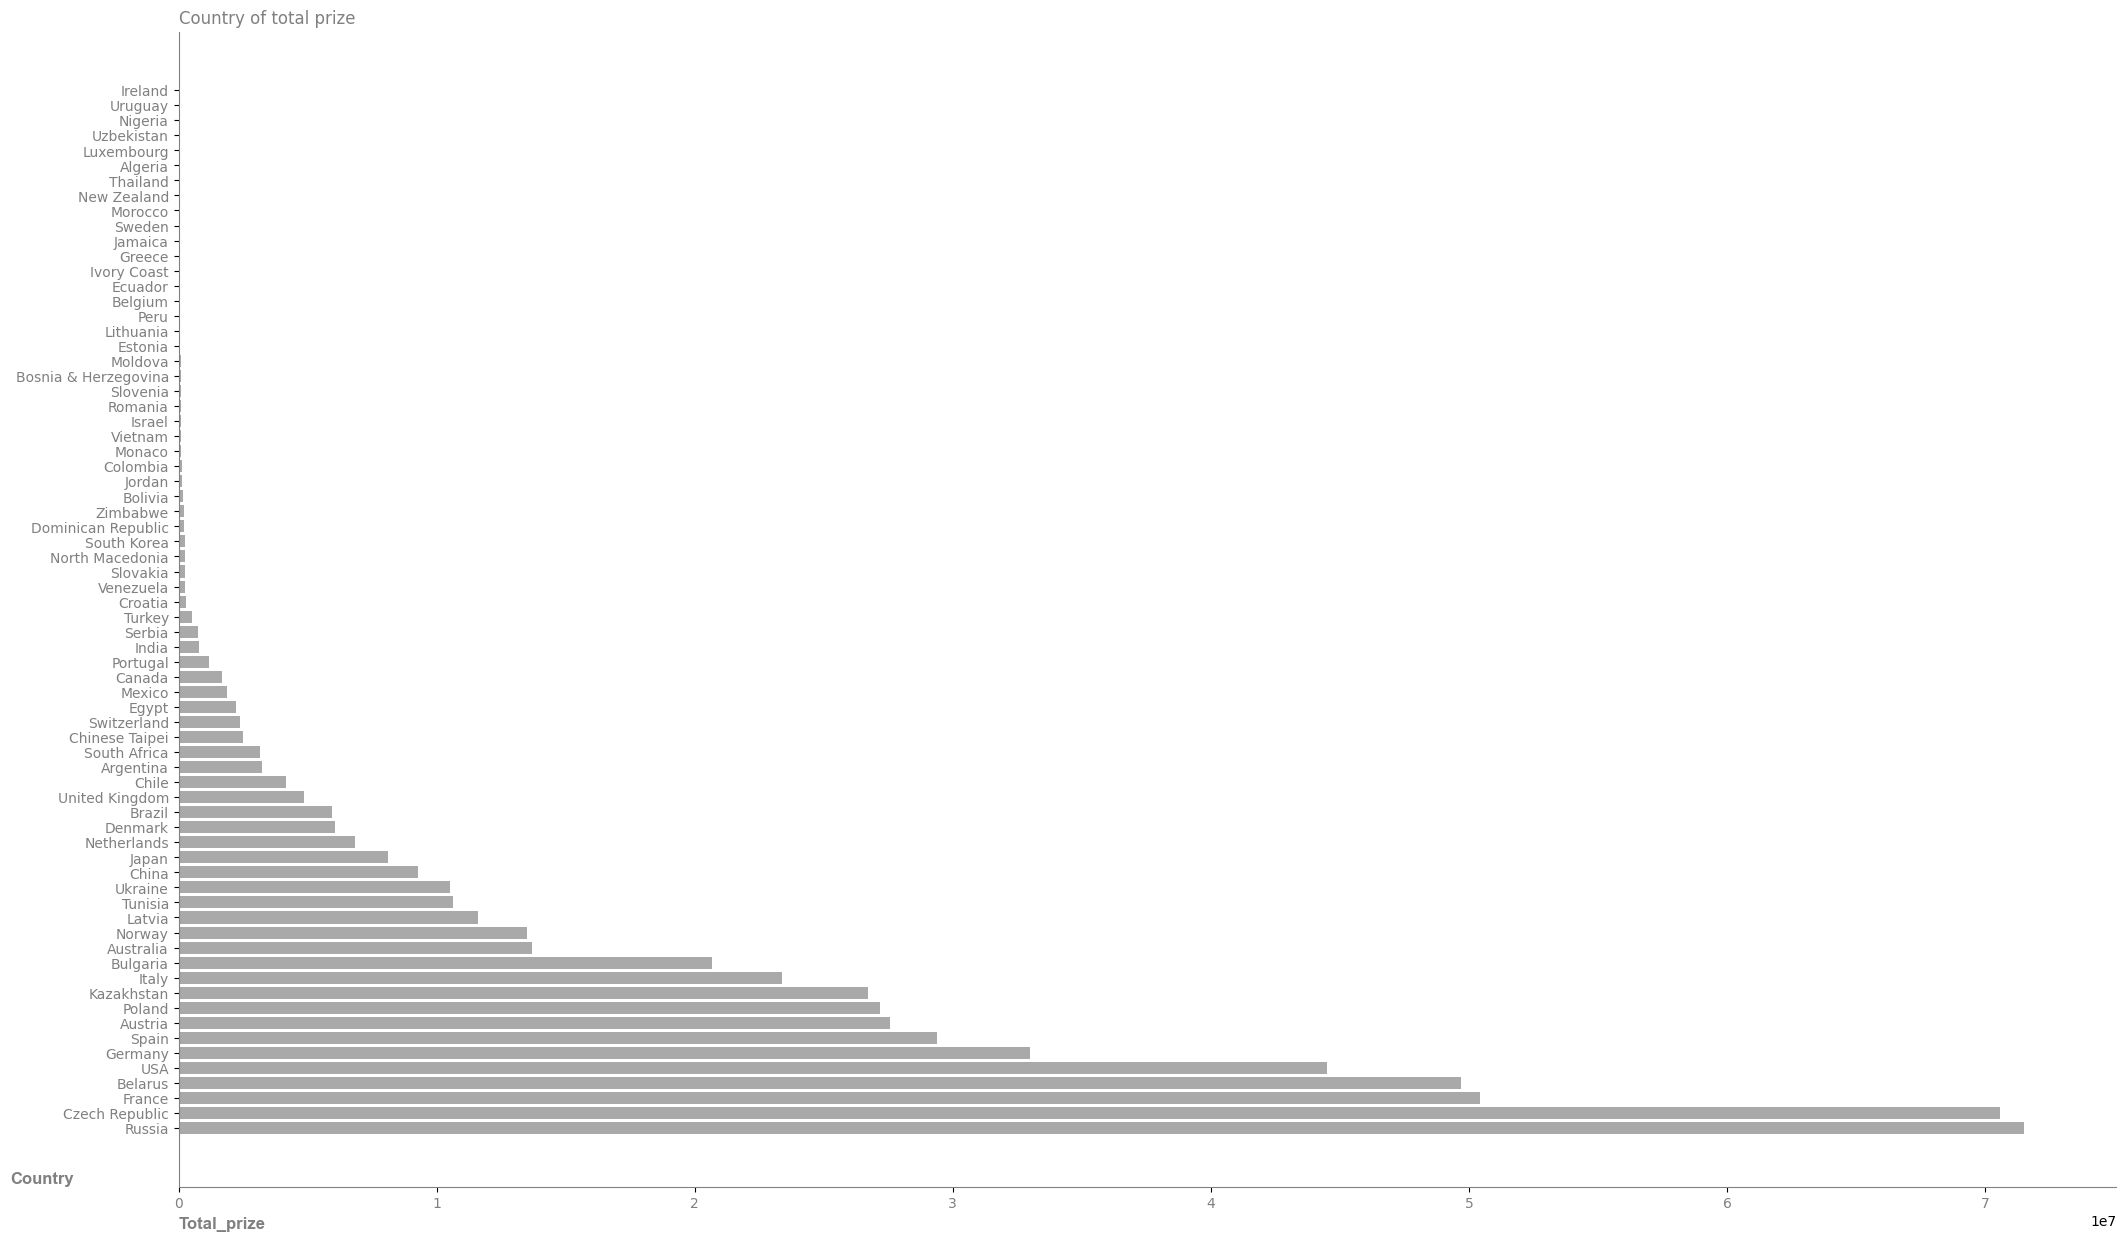

In [23]:
# Group by 'country' and calculate the sum of 'total_prize'
country_rank_player = country_succ_player.groupby('country', as_index=False)['total_prize'].sum()

# Sort the DataFrame based on the 'total_prize' sum
country_rank_player = country_rank_player.sort_values(by='total_prize',ascending=False).reset_index(drop=True)
# country_rank_player = country_rank_player.tail(10)
print(country_rank_player)


# Bar plot
plt.figure(figsize=(25,15))
plt.barh(country_rank_player['country'], country_rank_player['total_prize'], color='darkgray')
plt.xlabel('Total_prize', loc='left',  color='gray', fontdict={'family': 'Arial', 'size':12, 'weight':'bold'})
plt.ylabel('Country', loc='bottom', rotation=360, color='gray', fontdict={'family': 'Arial', 'size':12, 'weight':'bold'})
plt.gca().spines[['bottom','left']].set_color('gray')
plt.gca().spines[['top','right']].set_visible(False)
plt.xticks(color='gray')
plt.yticks(color='gray')
plt.title('Country of total prize', loc='left', color='gray')
plt.show()

- **Analyze:**
 * Among the countries participating in this tournament, it can be said that Russia is the country that has the most successful tennis players in terms of total prize and points, and the players of the Czech Republic are in the second place. These two countries are far away from the third country, France. On the other hand, the countries of Nigeria, Uruguay and Ireland had the weakest players respectively.

<font color = 'cyan'>Q7: What is the average number of aces per match ?</font>

In [4]:
main_path = 'data/raw_statistics_parquet/'
period_df = load_dataframe(main_path,'statistics_*.parquet' )

In [5]:
ace_info = period_df[period_df['statistic_name'] == 'aces']
ace_info = ace_info.dropna()

Agg functions are used to solve this question, which ignore null data, but by performing the data cleaning operation, ready data are provided to these fuctions and have no effect on the result.

 **Definition:**
  1. Ace  = is a legal serve that is not touched by the receiver, winning the point for the server.

   **Hints:**
  1. In the PeriodInfo table, there is a column called statistic_name, which contains the type of serve that was hit in each match.
  2. In this question, we use the 'statistic_name' column of ["PeriodInfo].

In [6]:
ace_info = period_df[(period_df['statistic_name'] == 'aces') & (period_df['period'] == 'ALL')]
ace_info = ace_info[['match_id',  'home_value', 'away_value']]
ace_info = ace_info.groupby('match_id')[['home_value' , 'away_value']].sum()
ace_info['total'] = ace_info[['home_value', 'away_value']].sum(axis=1)
ace_info['total'].mean()

4.009569377990431

 - **Analyze:**
  * On average, 4.009 service aces were hit in each match.That means, on average, the receiver did not touch the ball 4 times in each match and scored points.

<font color='cyan'>Q8: Is there a difference in the number of double faults based on gender?</font>

**Definitions**:
<ul>
    <li><b>Double Faults</b>: In tennis, if the serving player makes two mistakes in the same point, it is called a double fault, and they lose the point and the point is awarded to their opponent.</li>
</ul>

Load Data

In [3]:
main_path = 'data/raw_match_parquet/'
away_df = load_dataframe(main_path, 'away_team_11*.parquet')
home_df = load_dataframe(main_path, 'home_team_11*.parquet')

main_path = 'data/raw_statistics_parquet/'
period_df = load_dataframe(main_path, 'statistics_*.parquet')

C:\Users\Mohammad\AppData\Local\Temp\ipykernel_4216\1872257358.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_parquet(file)
C:\Users\Mohammad\AppData\Local\Temp\ipykernel_4216\1872257358.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_parquet(file)


Clean Data

In [15]:
all_matches = pd.concat([away_df[['match_id','gender']],
                          home_df[['match_id','gender']]]).drop_duplicates().dropna()
all_matches = pd.merge(all_matches, period_df[['match_id','statistic_name','period','home_value','away_value']].dropna(),on='match_id')
all_matches = all_matches[(all_matches['period'] == 'ALL') & (all_matches['statistic_name'] == 'double_faults')]
all_matches

,match_id,gender,statistic_name,period,home_value,away_value
1,11674074,F,double_faults,ALL,1,3
54,11674103,M,double_faults,ALL,1,4
108,11674105,M,double_faults,ALL,1,1
179,11674110,M,double_faults,ALL,3,2
233,11674111,M,double_faults,ALL,3,3
...,...,...,...,...,...,...
10715,11701933,M,double_faults,ALL,1,5
10769,11703331,M,double_faults,ALL,5,4
10839,11703442,M,double_faults,ALL,1,3
10893,11703524,M,double_faults,ALL,4,4


Result

,gender,home_value,away_value,total_value
0,F,418,398,816
1,M,215,207,422


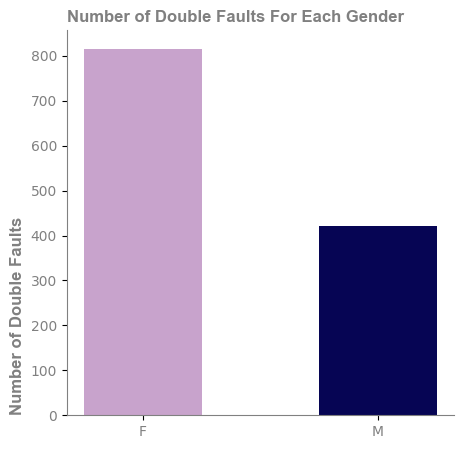

In [26]:
double_faults = all_matches.groupby('gender')[['home_value','away_value']].sum()

double_faults['total_value'] = double_faults.loc[:,'home_value':'away_value'].sum(axis=1)
double_faults = double_faults.reset_index()

plt.figure(figsize=(5, 5))
plt.bar(double_faults['gender'],double_faults['total_value'],color=['#c8a3cc','#060554'],width=0.5)
plt.ylabel('Number of Double Faults',loc='bottom',color = 'gray', fontdict={'family': 'Arial', 'size': 12, 'weight': 'bold'});
plt.title('Number of Double Faults For Each Gender',color='gray',loc='left', fontdict={'family': 'Arial', 'size': 12, 'weight': 'bold'})
plt.xticks(color='gray')
plt.yticks(color='gray');
plt.gca().spines[['bottom','left']].set_color('gray')
plt.gca().spines[['top','right']].set_visible(False)
double_faults

As can be seen in the above graph, the number of double faults is less for men than for women. In fact, it is about twice as much for women as for men.

<font color = 'cyan'>Q9: Which player has won the most tournaments in a single month?</font>

According to three tables <font color = 'yellow'>event_df , away_score_df , home_score_df</font> and columns <font color = 'yellow'>start_datetime , match_id , winner_code ,full_name , player_id</font>  We can get the following results :

1.In the start_datetime column, time data was placed as a timestamp. So, first we convert this data to datetime.

2.By checking the start_datetime column, we find that all the games were held on three dates : 2023/09/30 , 2023/10/01 and 2023/10/02.

3.'winner_code =1' It means winning the home game and 'winner_code =2 ' It means winning the away game.

In [ ]:
main_path = 'data/raw_match_parquet/'
away_df = load_dataframe(main_path , 'away_team_11*.parquet')
home_df = load_dataframe(main_path , 'home_team_11*.parquet')
event_df = load_dataframe(main_path , 'event_*.parquet')

In [28]:
event_df['start_datetime'] = pd.to_datetime(event_df['start_datetime'] , unit= 's').apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))

In [29]:
home_event = pd.merge(home_df , event_df, on='match_id').dropna(how= 'all')
away_event = pd.merge(away_df , event_df, on='match_id').dropna(how= 'all')

In [30]:
winers_home = home_event[home_event['winner_code'] == 1]
winers_away = away_event[away_event['winner_code']== 2]
winers = pd.concat([winers_home , winers_away])
tops = winers.groupby('start_datetime' , as_index=False)[['name']].value_counts()
tops

,start_datetime,name,count
0,2023-10,Milushev P.,3
1,2023-10,Panaras A.,3
2,2023-10,Kalina V.,3
3,2023-10,Shin J.,2
4,2023-10,Hoste Ferrer C.,2
...,...,...,...
379,2023-9,Stewart H.,1
380,2023-9,Glinka D.,1
381,2023-9,Tirante T.,1
382,2023-9,Estable J.,1


<font color = '#00ffff'>Q 10: Is there a correlation between a player's height and their ranking?</font>

In [4]:
# Load DataFrames
main_path = 'data/raw_match_parquet/'
away_df = load_dataframe(main_path, 'away_team_11*.parquet')
home_df = load_dataframe(main_path, 'home_team_11*.parquet')

C:\Users\Mohammad\AppData\Local\Temp\ipykernel_1248\1872257358.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_parquet(file)
C:\Users\Mohammad\AppData\Local\Temp\ipykernel_1248\1872257358.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_parquet(file)


**Hints:**
  * In this question, we use 'height', 'current_rank', 'player_id' columns from ["MatchAwayTeamInfo" , "MatchHomeTeamInfo] tables and also, Here we show the correlation between height and ranking of participating tennis players

**Data Cleaning:**
  * In this step, we clear the data that have null values

In [5]:
# Concatenate 'away_df' and 'home_df' DataFrames
corr_height_rank = pd.concat([away_df, home_df], ignore_index=True)
# Drop duplicates 
corr_height_rank = corr_height_rank[['height','current_rank' ,'player_id']].drop_duplicates()
# Drop null values
corr_height_rank = corr_height_rank.dropna()

correlation height to rank: 0.033


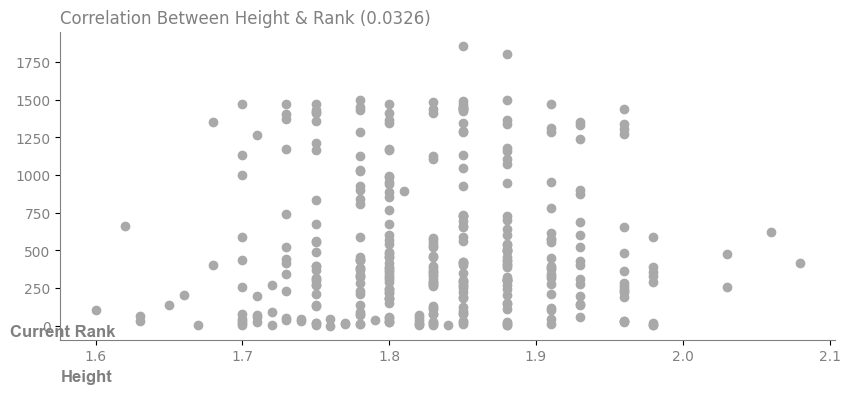

In [8]:

# Calculate the correlation between 'height' and 'current_rank'
correlation = corr_height_rank['height'].corr(corr_height_rank['current_rank'])

# Format the result as a string
print(f"correlation height to rank: {correlation:.3f}")

# Scatter plot
plt.figure(figsize=(10,4))
plt.scatter(corr_height_rank['height'], corr_height_rank['current_rank'], color='darkgray')
plt.xlabel('Height', loc='left',  color='gray', fontdict={'family': 'Arial', 'size':12, 'weight':'bold'})
plt.ylabel('Current Rank', loc='bottom', rotation=360, color='gray', fontdict={'family': 'Arial', 'size':12, 'weight':'bold'})
plt.gca().spines[['bottom','left']].set_color('gray')
plt.gca().spines[['top','right']].set_visible(False)
plt.xticks(color='gray')
plt.yticks(color='gray')
plt.title(f'Correlation Between Height & Rank ({correlation:.4f})', loc='left', color='gray')
plt.show()


- **Analyze:**
 * In general, we can say that the correlation between the players' height and their ranking is around 0.033, because the correlation between height and ranking is a very small value, they do not have a strong linear relationship with each other and have independent relationships with each other, and it seems that the correlation between the height of the players and their ranking is higher in the height range from 1.7 to 1.9 and the players who have a good ranking have a normal height to play tennis and to some extent height can play an important role in the success of the player. It is also worth mentioning. Players who are taller than 1.9 or less than 1.7 are not ranked better than other players. 

<font color = 'cyan'>Q11: What is the average duration of matches ?</font>

In [22]:
main_path = 'data/raw_match_parquet/'
time_df = load_dataframe(main_path,'time_*.parquet')

,match_id,period_1,period_2,period_3,period_4,period_5,current_period_start_timestamp
0,11673958,1960,2457,None,None,None,1696097817
1,11673962,None,None,None,None,None,1696176527
2,11673963,3403,2431,None,None,None,1696091852
3,11673993,2894,2309,2084,None,None,1696160248
4,11674000,3177,None,None,None,None,1696089777
...,...,...,...,...,...,...,...
759,11703444,3615,2741,None,None,None,1696255224
760,11703445,3764,2468,None,None,None,1696254556
761,11703470,3104,2662,None,None,None,1696258777
762,11703524,2118,2754,None,None,None,1696256179


In [62]:
time_df = time_df.dropna(how='all')

Here, to perform the data cleaning operation, because 'period_4' & 'period_5' have null values, and due to yhe large volume of null data, these two columns cannot be deleted, so that our output is iptimal and at the same time does not damage the data. Is not entersd, we set the dropna() operation so that it doesn't consider the data if all the rows are null.

 **Hints:**
  1. In the period 1 to 5 column, the duration of each period has been shown in seconds in each match based on the match_id.
  2.  In this question, we use the 'period_1','period_2','period_3','period_4','period_5' columns of ["MatchTimeInfo"] table.
  

In [63]:
time_df['total_duration'] = time_df.loc[:,'period_1':'period_5'].sum(axis=1)
average_duration = time_df['total_duration'].mean()
print(average_duration)

2523.0942408376964


- **Analyze:**
 * The average duration of matches was 2523.09 seconds. Which means that roughly half of the matches have lasted 42 minutes.

<font color='cyan'>Q12: What is the average number of games per set in men's matches compared to women's matches?</font>

**Definitions**:
<ul>
    <li><b>Game</b>: In tennis, a game is the smallest unit of scoring, and is won by the first player to reach four points with a margin of at least two points over their opponent. The points are scored as follows: 15, 30, 40, and then the game. If the score reaches 40-40, it is called deuce, and a player must win two consecutive points to win the game.</li>
    <li><b>Set</b>: A set is a collection of games, and is won by the first player to win six games with a margin of at least two games over their opponent. If the set reaches a score of 6-6, a tiebreak may be played to determine the winner of the set. In a tiebreak, the first player to reach seven points with a margin of at least two points wins the set.</li>
</ul>

Load Data

In [62]:
main_path = 'data/raw_match_parquet/'
away_df = load_dataframe(main_path, 'away_team_11*.parquet')
home_df = load_dataframe(main_path, 'home_team_11*.parquet')

main_path = 'data/raw_tennis_power_parquet/'
power_df = load_dataframe(main_path, 'power_*.parquet')

C:\Users\Mohammad\AppData\Local\Temp\ipykernel_4216\1872257358.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_parquet(file)
C:\Users\Mohammad\AppData\Local\Temp\ipykernel_4216\1872257358.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_parquet(file)


Clean Data

In [64]:
all_matches = pd.concat([away_df[['match_id','gender']], home_df[['match_id','gender']]]).drop_duplicates().dropna()

Result

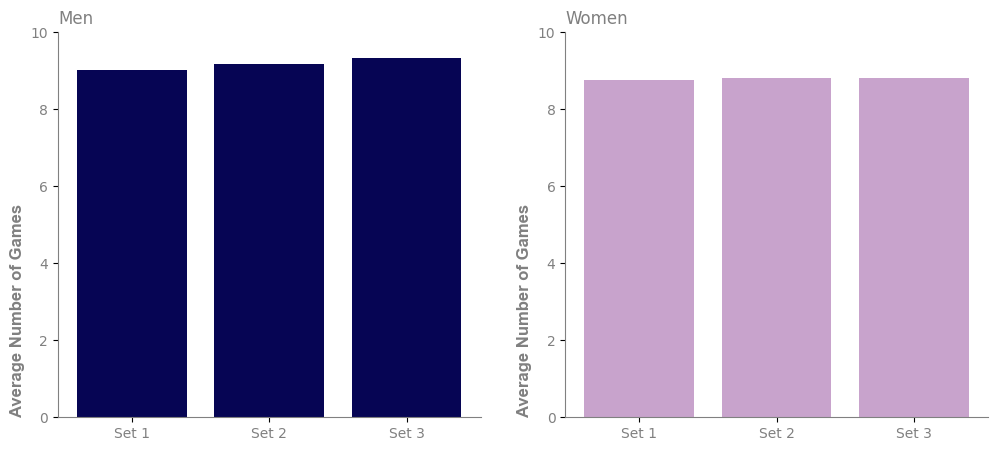

In [66]:


match_power = pd.merge(all_matches, power_df)
n_games = match_power.groupby(['match_id','set_num','gender'])['game_num'].count().reset_index()
n_games = n_games.groupby(['set_num','gender'])['game_num'].mean().reset_index()

men_games = n_games[n_games['gender'] == 'M']
women_games = n_games[n_games['gender'] == 'F']


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(men_games['set_num'].apply(lambda x: f'Set {x}')
        ,men_games['game_num'], color='#060554')
plt.title('Men',loc='left',color='gray')
plt.ylim(0, 10)
plt.gca().spines[['bottom','left']].set_color('gray')
plt.gca().spines[['top','right']].set_visible(False)
plt.xticks(color='gray')
plt.yticks(color='gray');
plt.ylabel('Average Number of Games',loc='bottom',color = 'gray', fontdict={'family': 'Arial', 'size': 12, 'weight': 'bold'})

plt.subplot(1, 2, 2)
plt.bar(women_games['set_num'].apply(lambda x: f'Set {x}')
        ,women_games['game_num'], color='#c8a3cc')
plt.title('Women',loc='left',color='gray');
plt.ylim(0, 10);
plt.gca().spines[['bottom','left']].set_color('gray')
plt.gca().spines[['top','right']].set_visible(False)
plt.xticks(color='gray')
plt.yticks(color='gray');
plt.ylabel('Average Number of Games',loc='bottom',color = 'gray', fontdict={'family': 'Arial', 'size': 12, 'weight': 'bold'});

The first point that can be obtained from the above chart is that all the matches whose information is recorded in the dataset were played in three sets. On the other hand, the results show that the number of games for men in all sets are slightly more than for women.

<font color = 'cyan'>Q13: What is the distribution of left-handed versus right-handed players?</font>

According to two tables <font color = 'yellow'>away_score_df , home_score_df</font> and column <font color = 'yellow'>plays</font>  We can get the following results :

1.NAN values ​​in this column are high.

2.There are more right-handed people than left-handed people.

In [9]:
main_path = 'data/raw_match_parquet/'
away_df = load_dataframe(main_path , 'away_team_11*.parquet')
home_df = load_dataframe(main_path , 'home_team_11*.parquet')

C:\Users\Mohammad\AppData\Local\Temp\ipykernel_1248\1872257358.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_parquet(file)
C:\Users\Mohammad\AppData\Local\Temp\ipykernel_1248\1872257358.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_parquet(file)


In [10]:
plays = pd.concat([home_df , away_df])[['player_id' , 'plays']].drop_duplicates()
plays = plays.dropna()

In [11]:
s_plays = plays['plays'].value_counts()
s_plays

plays
right-handed    244
left-handed      32
Name: count, dtype: int64

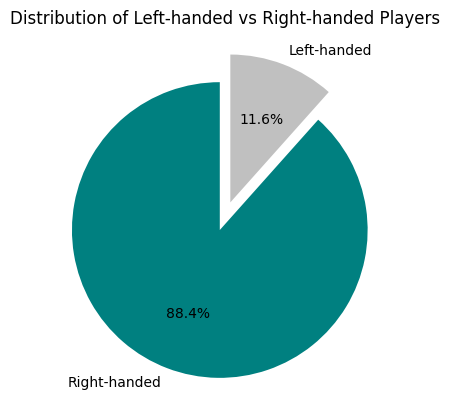

In [12]:
sectors = "Right-handed", "Left-handed"
amount = s_plays 
colors = ["Teal","Silver"]
plt.pie(amount, labels = sectors, colors = colors , explode = (0.1, 0.1), autopct = "%1.1f%%", startangle = 90)
plt.title('Distribution of Left-handed vs Right-handed Players', color='black')
plt.show()

<font color = '#00ffff'>Q14: What is the most common type of surface used in tournaments?</font>

In [35]:
# Load DataFrames
main_path = 'data/raw_match_parquet/'
tournament_df = load_dataframe(main_path, 'tournament_*.parquet')

**Hints:**
  * In this question, we use 'ground_type' column from ["MatchTournamentInfo"] table and also, Here we show the number of matches played in all types of tennis courts

**Data Cleaning:**
  * In this step, we clear the data that have null values

In [36]:
# select 'ground_type', 'match_id'  columns from tournament_df
sur_tournament = tournament_df[['ground_type', 'match_id']]
# Drop null values
sur_tournament = sur_tournament.dropna()
sur_tournament.info()

<class 'pandas.core.frame.DataFrame'>
Index: 747 entries, 0 to 763
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ground_type  747 non-null    object
 1   match_id     747 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 17.5+ KB


ground_type
Hardcourt outdoor    336
Red clay             323
Hardcourt indoor      84
Carpet indoor          3
Synthetic outdoor      1
Name: count, dtype: int64


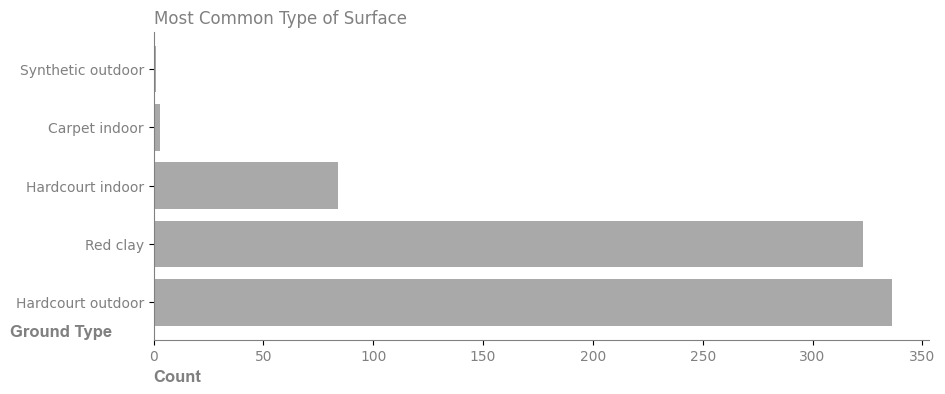

In [37]:
# Count occurrences of each unique value in 'ground_type' column
sur_tournament = sur_tournament['ground_type'].value_counts()
print(sur_tournament)

# Bar plot
plt.figure(figsize=(10,4))
plt.barh(sur_tournament.index, sur_tournament.values, color='darkgray')
plt.xlabel('Count', loc='left',  color='gray', fontdict={'family': 'Arial', 'size':12, 'weight':'bold'})
plt.ylabel('Ground Type', loc='bottom', rotation=360, color='gray', fontdict={'family': 'Arial', 'size':12, 'weight':'bold'})
plt.gca().spines[['bottom','left']].set_color('gray')
plt.gca().spines[['top','right']].set_visible(False)
plt.xticks(color='gray')
plt.yticks(color='gray')
plt.title('Most Common Type of Surface', loc='left', color='gray')
plt.show()

- **Analyze:**
 * In this tournament, five types of playing fields were used, and the most games were played on the Hardcourt outdoor field, which is 336 games. Also, 323 games were played on the Red clay field, which was the second most common field used in this tournament. In this tournament, only 1 game was played on the synthetic outdoor field.

<font color = 'cyan'>Q15: How many distinct countries are represented in the dataset ?</font>

In [ ]:
main_path = 'data/raw_match_parquet/'
away_df = load_dataframe(main_path, 'away_team_11*.parquet')
home_df = load_dataframe(main_path, 'home_team_11*.parquet')
venue_df = load_dataframe(main_path, 'venue_*.parquet')

In [72]:
all_countries = pd.concat([venue_df['country'],home_df['country'],away_df['country']])
all_countries = all_countries.dropna()

In [73]:
players_country = pd.concat([home_df['country'],away_df['country']])
players_country = players_country.dropna()

In [74]:
studiums_country = venue_df['country']
studiums_country = studiums_country.dropna()

In this question we use 'country' column of that three tables. This column contains null data, which can be deleted whitout much change in the mentioned table.

 **Hints:**
 1. The countries listed in the 'home' & 'away' tables represented the countries of the players.
 2. The countries listed in the 'venue' table indicate the venue of the stadiums.
 3. In this question, we use the 'country' columns of ["MatchVenueInfo", "MatchHomeTeamInfo", "MatchAwayTeamInfo"] tables.

In [75]:
countries1 = venue_df['country'].unique()
countries2 = home_df['country'].unique()
countries3 = away_df['country'].unique()

all_countries = pd.concat([venue_df['country'],home_df['country'],away_df['country']]).unique()


distinct_country = len(all_countries)
print("count of distinct countries:", distinct_country)

count of distinct countries: 72


In [76]:
countries2 = home_df['country'].unique()
countries3 = away_df['country'].unique()

players_country = pd.concat([home_df['country'],away_df['country']]).unique()
num_players_country = len(players_country)
print("count of player countries:", num_players_country)

count of player countries: 71


In [77]:
studiums_country = venue_df['country'].unique()
num_stadiums_country = len(studiums_country)
print("count of stadiums countries:", num_stadiums_country  )

count of stadiums countries: 20


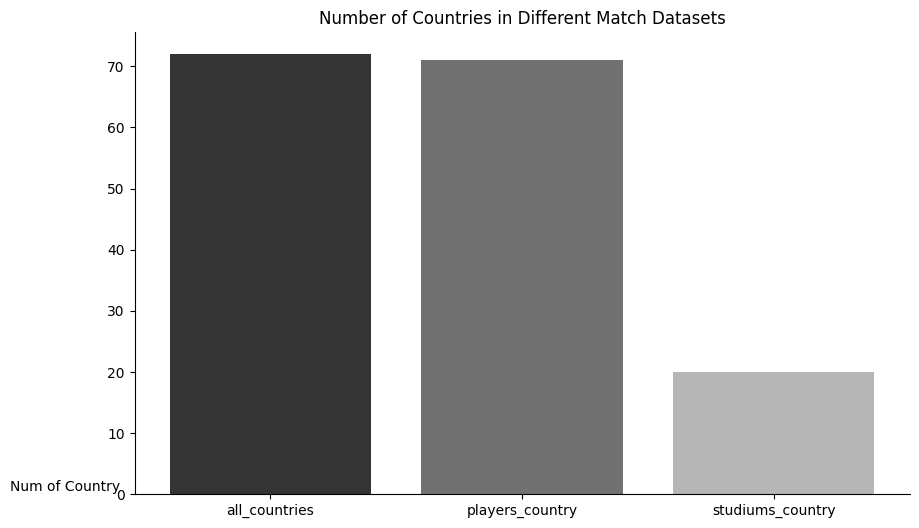

In [78]:
data = {'Data': ['all_countries','players_country','studiums_country'], 'Number of Countries': [distinct_country,num_players_country,num_stadiums_country ]}
df = pd.DataFrame(data)

plt.figure(figsize=(10,6))
plt.bar(df['Data'],df['Number of Countries'],color=['#343434', '#717171', '#b6b6b6'])
plt.title('Number of Countries in Different Match Datasets')
plt.ylabel('Num of Country' ,  loc='bottom' , rotation=360 , labelpad=70)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

- **Analyze:**
 * Players participated to the tournament from 71 different countries and also the tournament was held in 20 different stadiums in different countries.
 * The total number of non-repeated countries whose names are mentioned in the dataset is 72 countries.
 * It can be said that since several matches can be held in one stadium, the number of stadiums is limited, and as a result, the number of countries where the stadium is located is less than the number of players. And since the total number of countries includes the number of stadiums in addition to the number of players, it has more than the number of players and therefore includes the largest number.

<font color='cyan'>Q16: Which player has the highest winning percentage against top 10 ranked opponents?</font>

Load Data

In [77]:
main_path = 'data/raw_match_parquet/'
away_df = load_dataframe(main_path, 'away_team_11*.parquet')
home_df = load_dataframe(main_path, 'home_team_11*.parquet')
event_df = load_dataframe(main_path, 'event_*.parquet')

C:\Users\Mohammad\AppData\Local\Temp\ipykernel_4216\1872257358.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_parquet(file)
C:\Users\Mohammad\AppData\Local\Temp\ipykernel_4216\1872257358.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_parquet(file)


Clean Data

In [80]:
new_home = home_df[['match_id', 'name', 'player_id', 'current_rank']].dropna()
new_away = away_df[['match_id', 'name', 'player_id', 'current_rank']].dropna()
new_event = event_df[['match_id', 'winner_code']].dropna()

Result

In [81]:
all_matches = pd.merge(new_home, new_away, on='match_id',
                       suffixes=['_home', '_away'])
all_matches = all_matches[(all_matches['current_rank_home'] <= 10) | (
    all_matches['current_rank_away'] <= 10)]
all_matches = pd.merge(all_matches, new_event, on='match_id')

winner_vs_tops = all_matches[((all_matches['winner_code'] == 1) & (all_matches['current_rank_away'] <= 10)) | (
    (all_matches['winner_code'] == 2) & (all_matches['current_rank_home'] <= 10))]
winner_vs_tops

,match_id,name_home,player_id_home,current_rank_home,name_away,player_id_away,current_rank_away,winner_code
0,11674074,Kudermetova V.,66968,19,Pegula J.,44834,5,1
5,11675446,Rune H.,283070,8,Dimitrov G.,23581,14,2
12,11697123,Vondroušová M.,152804,7,Kalinina A.,90664,27,2
14,11698397,Krejčíková B.,60398,10,Andreeva M.,406776,57,2


By checking the dataset, it was found that the `winner code` column in the `Match Event Info` table contains two values 1 and 2. The value 1 in this column indicates the win of the player who participated in the match as the _home_, and the value 2 in this column indicates the win of the _away_ player.

Thus, the above table shows the matches in which the players with a rank less than 10 have lost. The players who managed to win against these high-level players had a rank above 10. In three of the four matches that players with a rank above 10 have won, they have appeared in the match as away players, and only one player has managed to get a win against a top level player as home player. Each of these players has only managed to win one match against top level players. The players who managed to defeat the top level players are: _Kudermetova V._, _Dimitrov G._, _Kalinina A._ and _Andreeva M_.

<font color = 'cyan'>Q17: What is the average number of breaks of serve per match?</font>

According to table <font color = 'yellow'>power_df</font> and columns <font color = 'yellow'>match_id , break_occurred </font>  We can get the following results :

1.Average number of breaks of serve per match is 7.15


In [36]:
main_path = 'data/raw_tennis_power_parquet/'
power_df = load_dataframe(main_path , 'power_*.parquet')

In [37]:
power_df = power_df[['break_occurred' , 'match_id']].dropna()

In [38]:
power_df.groupby('match_id')['break_occurred'].sum().mean()

7.157303370786517

<h3><font color='yellow'> More Analysis On The Dataset (Additional Questions)</font></h3>

<font color = 'cyan'>Q1: Which tennis players have the same place of birth and residence?</font>

According to two tables <font color = 'yellow'>away_score_df , home_score_df</font> and columns <font color = 'yellow'>full_name , residence, birthplace</font>  We can get the following results :

1.47 people have the same place of residence and place of birth.

In [ ]:
main_path = 'data/raw_match_parquet/'
away_df = load_dataframe(main_path , 'away_team_11*.parquet')
home_df = load_dataframe(main_path , 'home_team_11*.parquet')

In [40]:
same = pd.concat([home_df, away_df])[['full_name' , 'residence', 'birthplace']].drop_duplicates().reset_index()
same = same.dropna()

In [41]:
same_new =same.loc[same['residence'] == same['birthplace']]
same_new.groupby('full_name' , as_index= False)[['residence' , 'birthplace']].sum()

,full_name,residence,birthplace
0,"Alcaraz, Carlos","El Palmar, Murcia, Spain","El Palmar, Murcia, Spain"
1,"Alvisi, Eleonora","Barletta, Italy","Barletta, Italy"
2,"Barroso Campos, Alberto",Montijo,Montijo
3,"Bolt, Alex","Murray Bridge, Australia","Murray Bridge, Australia"
4,"Bublik, Alexander","Gatchina, Russia","Gatchina, Russia"
5,"Caruso, Salvatore","Avola, Italy","Avola, Italy"
6,"Cox, Daniel","Lincoln, Great Britain","Lincoln, Great Britain"
7,"Dalla Valle, Enrico",Ravenna,Ravenna
8,"Delaney, Jesse",Sydney,Sydney
9,"Donskoy, Evgeny","Moscow, Russia","Moscow, Russia"


<font color='cyan'>Q2: Number of stadiums in different countries</font>

Load Data

In [12]:
main_path = 'data/raw_match_parquet/'
venue_df = load_dataframe(main_path, 'venue_*.parquet')

Clean Data

In [13]:
country_stadium = venue_df[['country','stadium']].dropna()

Result

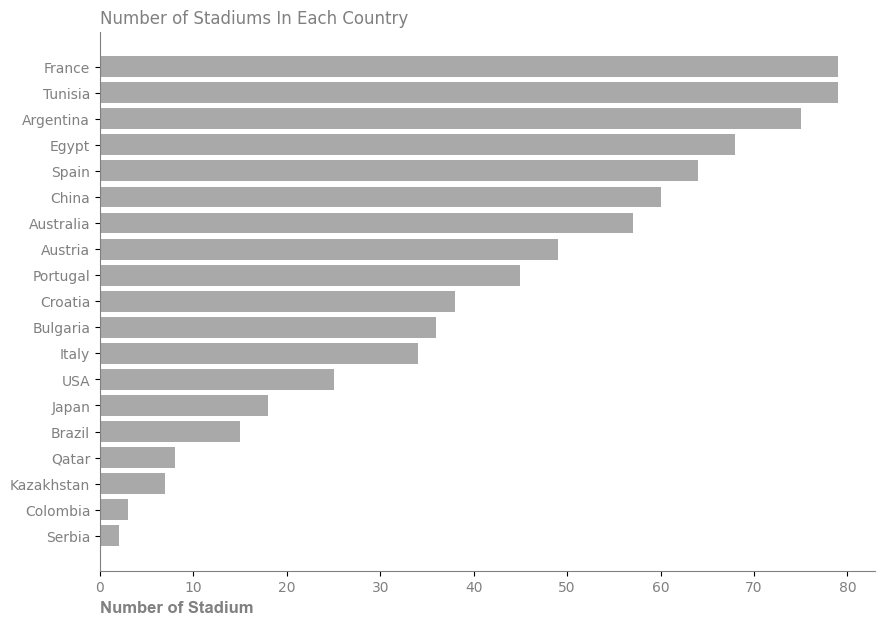

In [14]:
country_stadium = venue_df.groupby('country')['stadium'].count().sort_values().reset_index()

plt.figure(figsize=(10,7))

plt.barh(country_stadium['country'],country_stadium['stadium'],color='darkgray');
plt.xlabel('Number of Stadium',loc='left',color='gray', fontdict={'family': 'Arial', 'size': 12, 'weight': 'bold'})
plt.gca().spines[['bottom','left']].set_color('gray')
plt.gca().spines[['top','right']].set_visible(False)
plt.xticks(color='gray')
plt.yticks(color='gray');
plt.title('Number of Stadiums In Each Country',loc='left',color='gray');

The above plot shows that _France_ and _Tunisia_ have the largest number of stadiums. These numbers can indicate that tennis is very important in these countries. On the other hand, _Serbia_ has the least number of stadiums.

Tennis in France is very popular and the country has a rich tennis tradition. It hosts several major tennis tournaments, including the French Open, one of the four Grand Slam events. France has produced many world-class tennis players and has a strong tennis culture. The sport is widely followed and enjoyed by both professional and amateur players, as well as fans across the country.

Tennis in Tunisia has been steadily growing in popularity over the years. The country has produced several talented tennis players who have competed at the international level. Tunisia also hosts various tennis tournaments, including those sanctioned by the International Tennis Federation (ITF). The sport has gained a significant following among both players and fans, and tennis facilities and clubs are available in different parts of the country. Overall, tennis has become an integral part of Tunisia's sports culture.

<font color='cyan'>Q3: In which stadium has the largest number of tournaments been held?</font>

Load Data

In [82]:
main_path = 'data/raw_match_parquet/'
venue_df = load_dataframe(main_path, 'venue_*.parquet')

main_path = 'data/raw_match_parquet/'
tournament_df = load_dataframe(main_path, 'tournament_*.parquet')

Clean Data

In [83]:
venue_df = venue_df[['country','stadium','match_id']].dropna()
tournament_df = tournament_df[['match_id','tournament_id']].dropna()

Result

,country,stadium,n_tournament
0,France,Court Central,28
1,France,Court 1,21
2,Egypt,Court 3,18
3,Egypt,Court 4,17
4,Egypt,Court 5,12
5,China,Diamond Court,12
6,Tunisia,Court 7,11


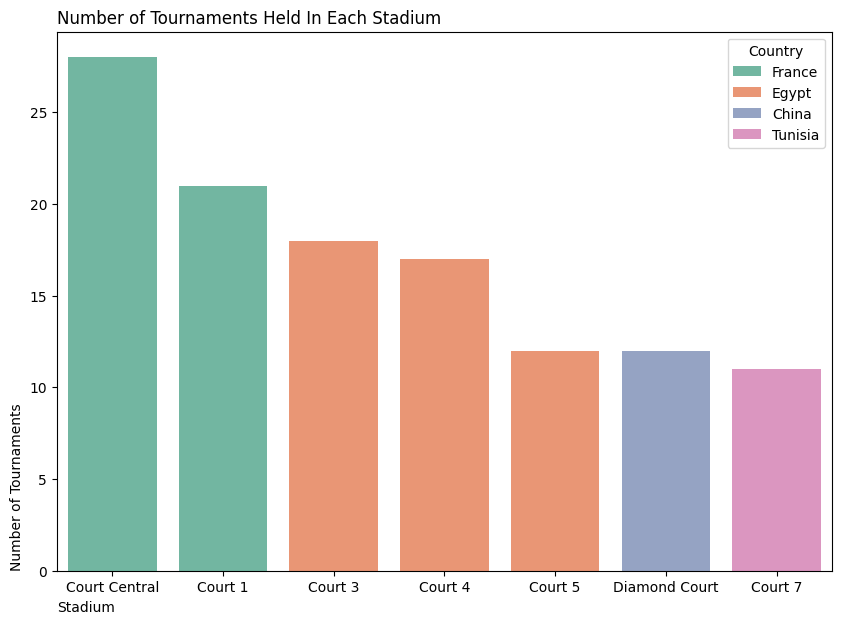

In [90]:
tour_stadium_df = pd.merge(venue_df,tournament_df,on='match_id')
n_tour = tour_stadium_df.groupby(['country','stadium'])['tournament_id'].count()\
    .sort_values(ascending=False).reset_index().head(7)

n_tour.rename(columns={'tournament_id':'n_tournament'},inplace=True)

plt.figure(figsize=(10,7))
sns.barplot(x=n_tour['stadium'], y=n_tour['n_tournament'],palette='Set2',hue=n_tour['country'])\
    .set_title('Number of Tournaments Held In Each Stadium',loc='left')
ax = plt.gca()
ax.set_xlabel('Stadium',loc='left')
ax.set_ylabel('Number of Tournaments',loc='bottom');
plt.legend(title='Country');
n_tour

As mentioned in the second question, France and Tunisia have the largest number of stadiums. Also, in the above figure, France has hosted the most tournaments in Court Central and Court 1 stadiums. Despite the fact that Tunisia has many stadiums like France, it ranks seventh in terms of hosting tournaments, and Egypt, which ranks fourth in the number of stadiums, hosts the most tournaments after France. Among the six countries that have the most stadiums, only China is from the Asian continent, and according to the above graph, a significant number of tennis tournaments have been held in this country.

 <font color = 'cyan'> Q4: Proportion of left-handed & right-handed players by country</font>

In [ ]:
main_path = 'data/raw_match_parquet/'
away_df = load_dataframe(main_path, 'away_team_11*.parquet')
home_df = load_dataframe(main_path, 'home_team_11*.parquet')

In [82]:
combined_df = pd.concat([home_df, away_df])
combined_df = combined_df.dropna()

In these two tables that we used, there are a lot of null data that ignoring them can damage our data. But since agg functions have been used to solve this question, and the feature of these functions is that they ignore null data, then we can deliver cleandata to the input of the code.

 **Hints:**
  1. The 'plays' column specifies whether each player is left-handed or right-handed.
  2. In this question, we use 'country' and 'plays' columns of ['MatchAwayTeamInfo','MatchAwayTeamInfo'] tables.
  

In [83]:
combined_df = pd.concat([home_df, away_df])

country_ratios = combined_df.groupby('country')['plays'].value_counts().unstack().fillna(0)
country_ratios['left_ratio'] = country_ratios['left-handed'] / country_ratios['right-handed']

country_ratios.head()

plays,left-handed,right-handed,left_ratio
country,,,
Algeria,0.0,1.0,0.000000
Argentina,0.0,9.0,0.000000
Australia,2.0,13.0,0.153846
Austria,1.0,5.0,0.200000
Belarus,0.0,6.0,0.000000


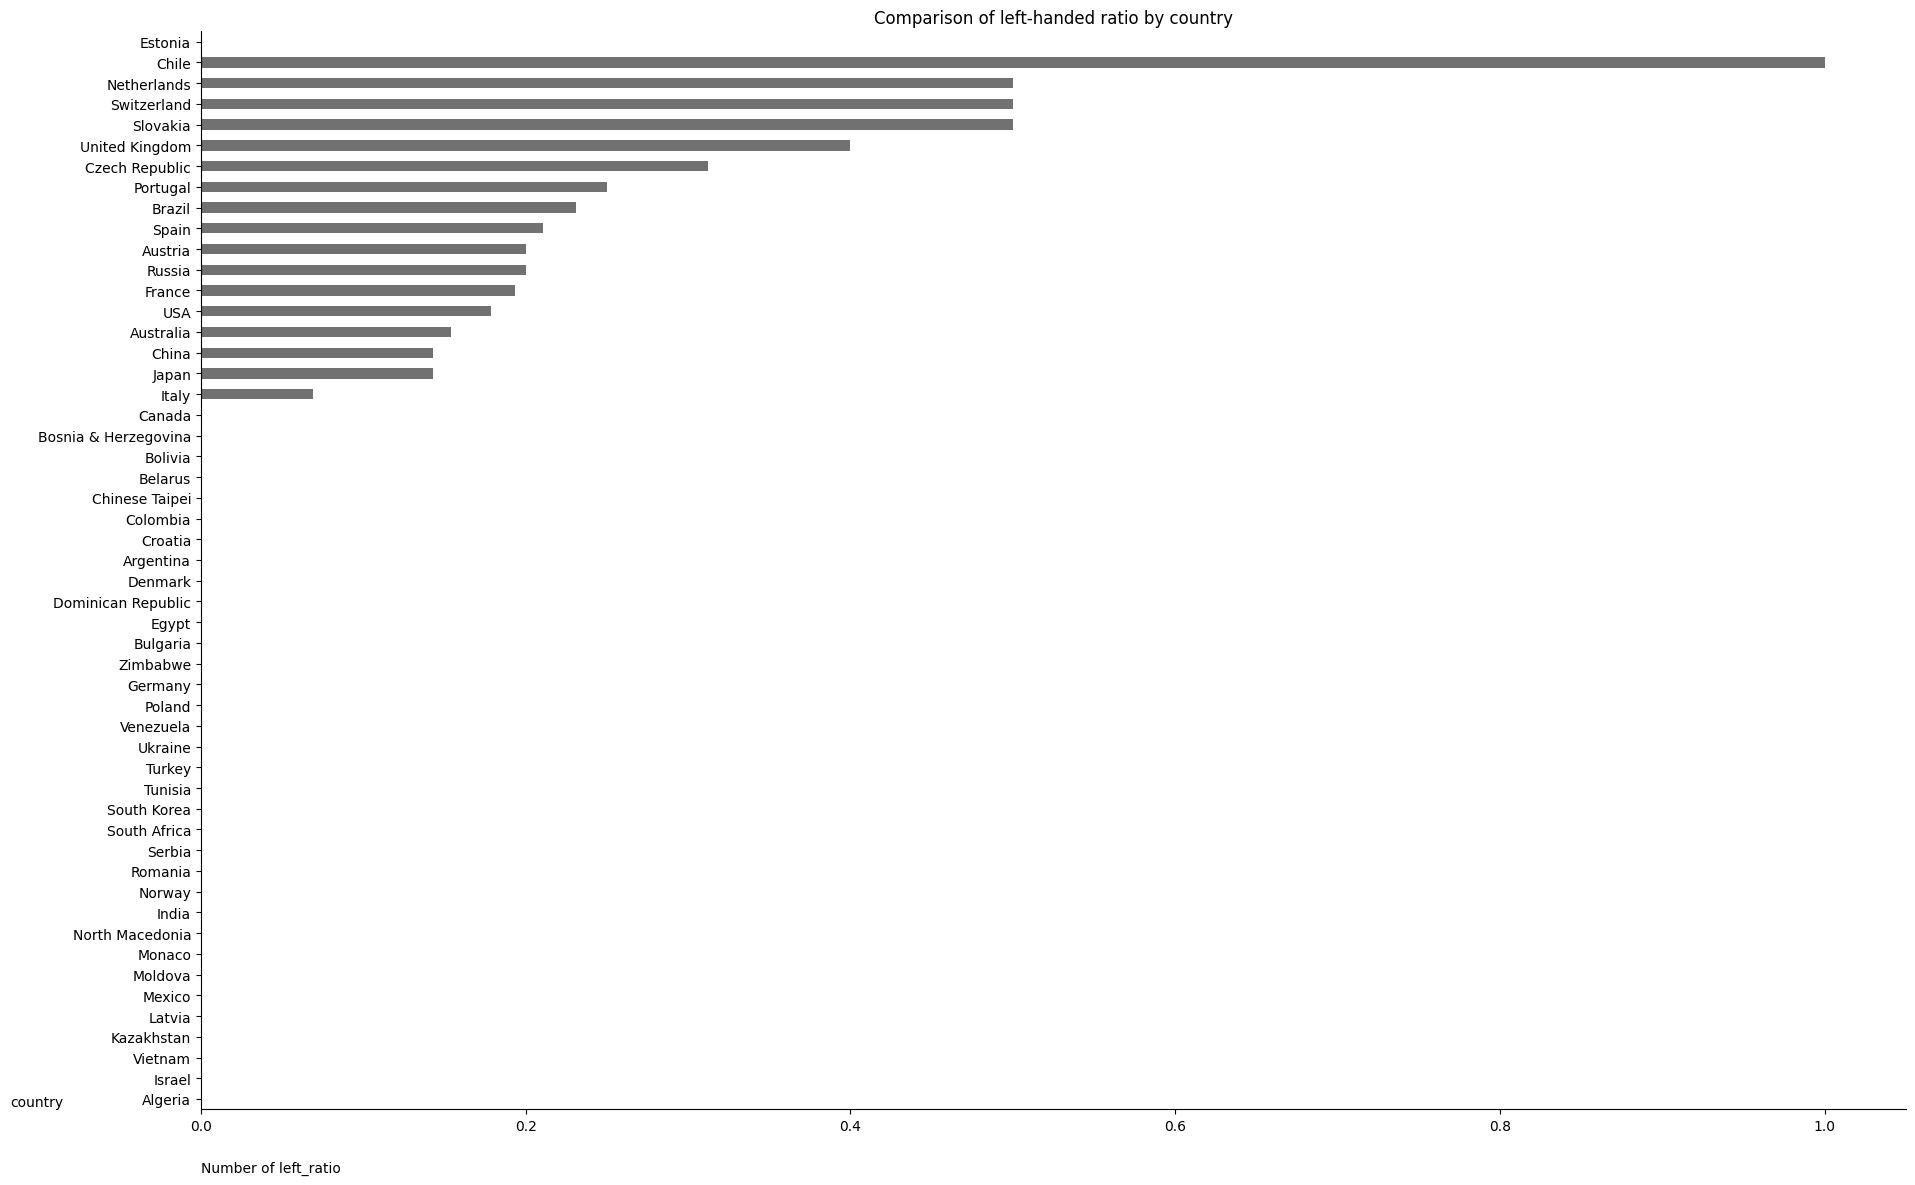

In [84]:
plt.figure(figsize=(22,14))
country_ratios['left_ratio'].sort_values().plot(kind='barh', color='#717171')
plt.title('Comparison of left-handed ratio by country')
plt.xticks(rotation=360)
plt.ylabel('country' ,  loc='bottom' , rotation=360 , labelpad=20)
plt.xlabel('Number of left_ratio' ,  loc='left' , rotation=360 , labelpad=20)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(axis='x',linestyle=' ')
plt.show()

 - **Analyze:**
  * As we see around in daily life, the number of left-handed people is less than the number of right-handed people. And if you look at the left column, it is mainly composed of 0, which means that there are no left-handed players in those countries. which, on the other hand, causes the players in those countries to be all right-handed. Now, if we divide the number of left-handers by the right-handers, or in other words, get a ratio of the number of left-handers to right-handers, due to the small number of left-handed people, most of the numbers in this column become zero, and the highest value in this column It is equal to one, which is the country of Chile. That is, in this country, the number of left-handed players is twice as high as the number of right-handed players.

<font color = 'cyan'>Q5: Ratio of left-handers and right-handers according to gender?</font>

According to two tables <font color = 'yellow'>away_score_df , home_score_df</font> and column <font color = 'yellow'>plays , gender</font>  We can get the following results :

1.NAN values ​​in this column are high.

2.The number of right-handed players in both women and men is more than the number of left-handed players.

3.There are more male players than female players.

In [42]:
main_path = 'data/raw_match_parquet/'
away_df = load_dataframe(main_path , 'away_team_11*.parquet')
home_df = load_dataframe(main_path , 'home_team_11*.parquet')

C:\Users\Mohammad\AppData\Local\Temp\ipykernel_18788\1872257358.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_parquet(file)
C:\Users\Mohammad\AppData\Local\Temp\ipykernel_18788\1872257358.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_parquet(file)


In [43]:
plays_gender = pd.concat([home_df , away_df]).drop_duplicates()
plays_gender = plays_gender.dropna( how= 'all')

In [44]:
plays_gender.groupby('gender')['plays'].value_counts()

gender  plays       
F       right-handed     83
        left-handed       9
M       right-handed    229
        left-handed      37
Name: count, dtype: int64

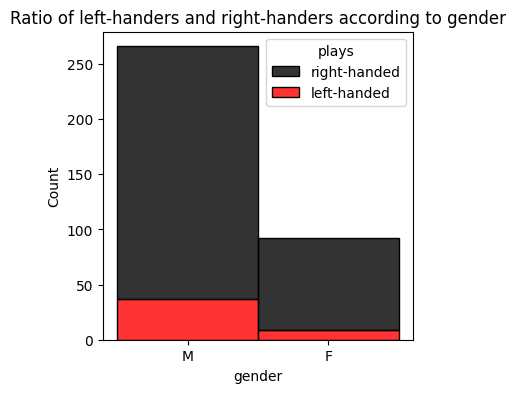

In [45]:
plt.figure(figsize= (4 , 4 ))
sns.histplot(x = 'gender' , data =plays_gender , hue= 'plays' , palette= ['black' , 'red'] , multiple= 'stack' ,alpha=0.8 )
plt.title("Ratio of left-handers and right-handers according to gender")
plt.show()

 <font color = 'cyan'> Q6: Number of players by country</font>

In [ ]:
main_path = 'data/raw_match_parquet/'
away_df = load_dataframe(main_path, 'away_team_11*.parquet')
home_df = load_dataframe(main_path, 'home_team_11*.parquet')

In [86]:
combined_df = pd.concat([home_df,away_df])
combined_df = combined_df.dropna()

In this question, because the agg function was used to solve the question, we can ignore the null data & apply data cleaning operations.

 **Hints:**
 1. In this question, we use 'country' column of ['MatchAwayTeamInfo','MatchAwayTeamInfo'] tables.

In [87]:
combined_df = pd.concat([home_df,away_df])
players_count = combined_df['country'].value_counts()
players_count

country
France        85
Italy         59
USA           55
Argentina     44
Germany       40
              ..
Luxembourg     1
Venezuela      1
Bolivia        1
Algeria        1
Greece         1
Name: count, Length: 70, dtype: int64

In [88]:
combined_df = pd.concat([home_df,away_df])
players_count = combined_df['country'].value_counts()
players_count.describe()

count    70.000000
mean     11.714286
std      16.529414
min       1.000000
25%       2.000000
50%       4.500000
75%      12.000000
max      85.000000
Name: count, dtype: float64

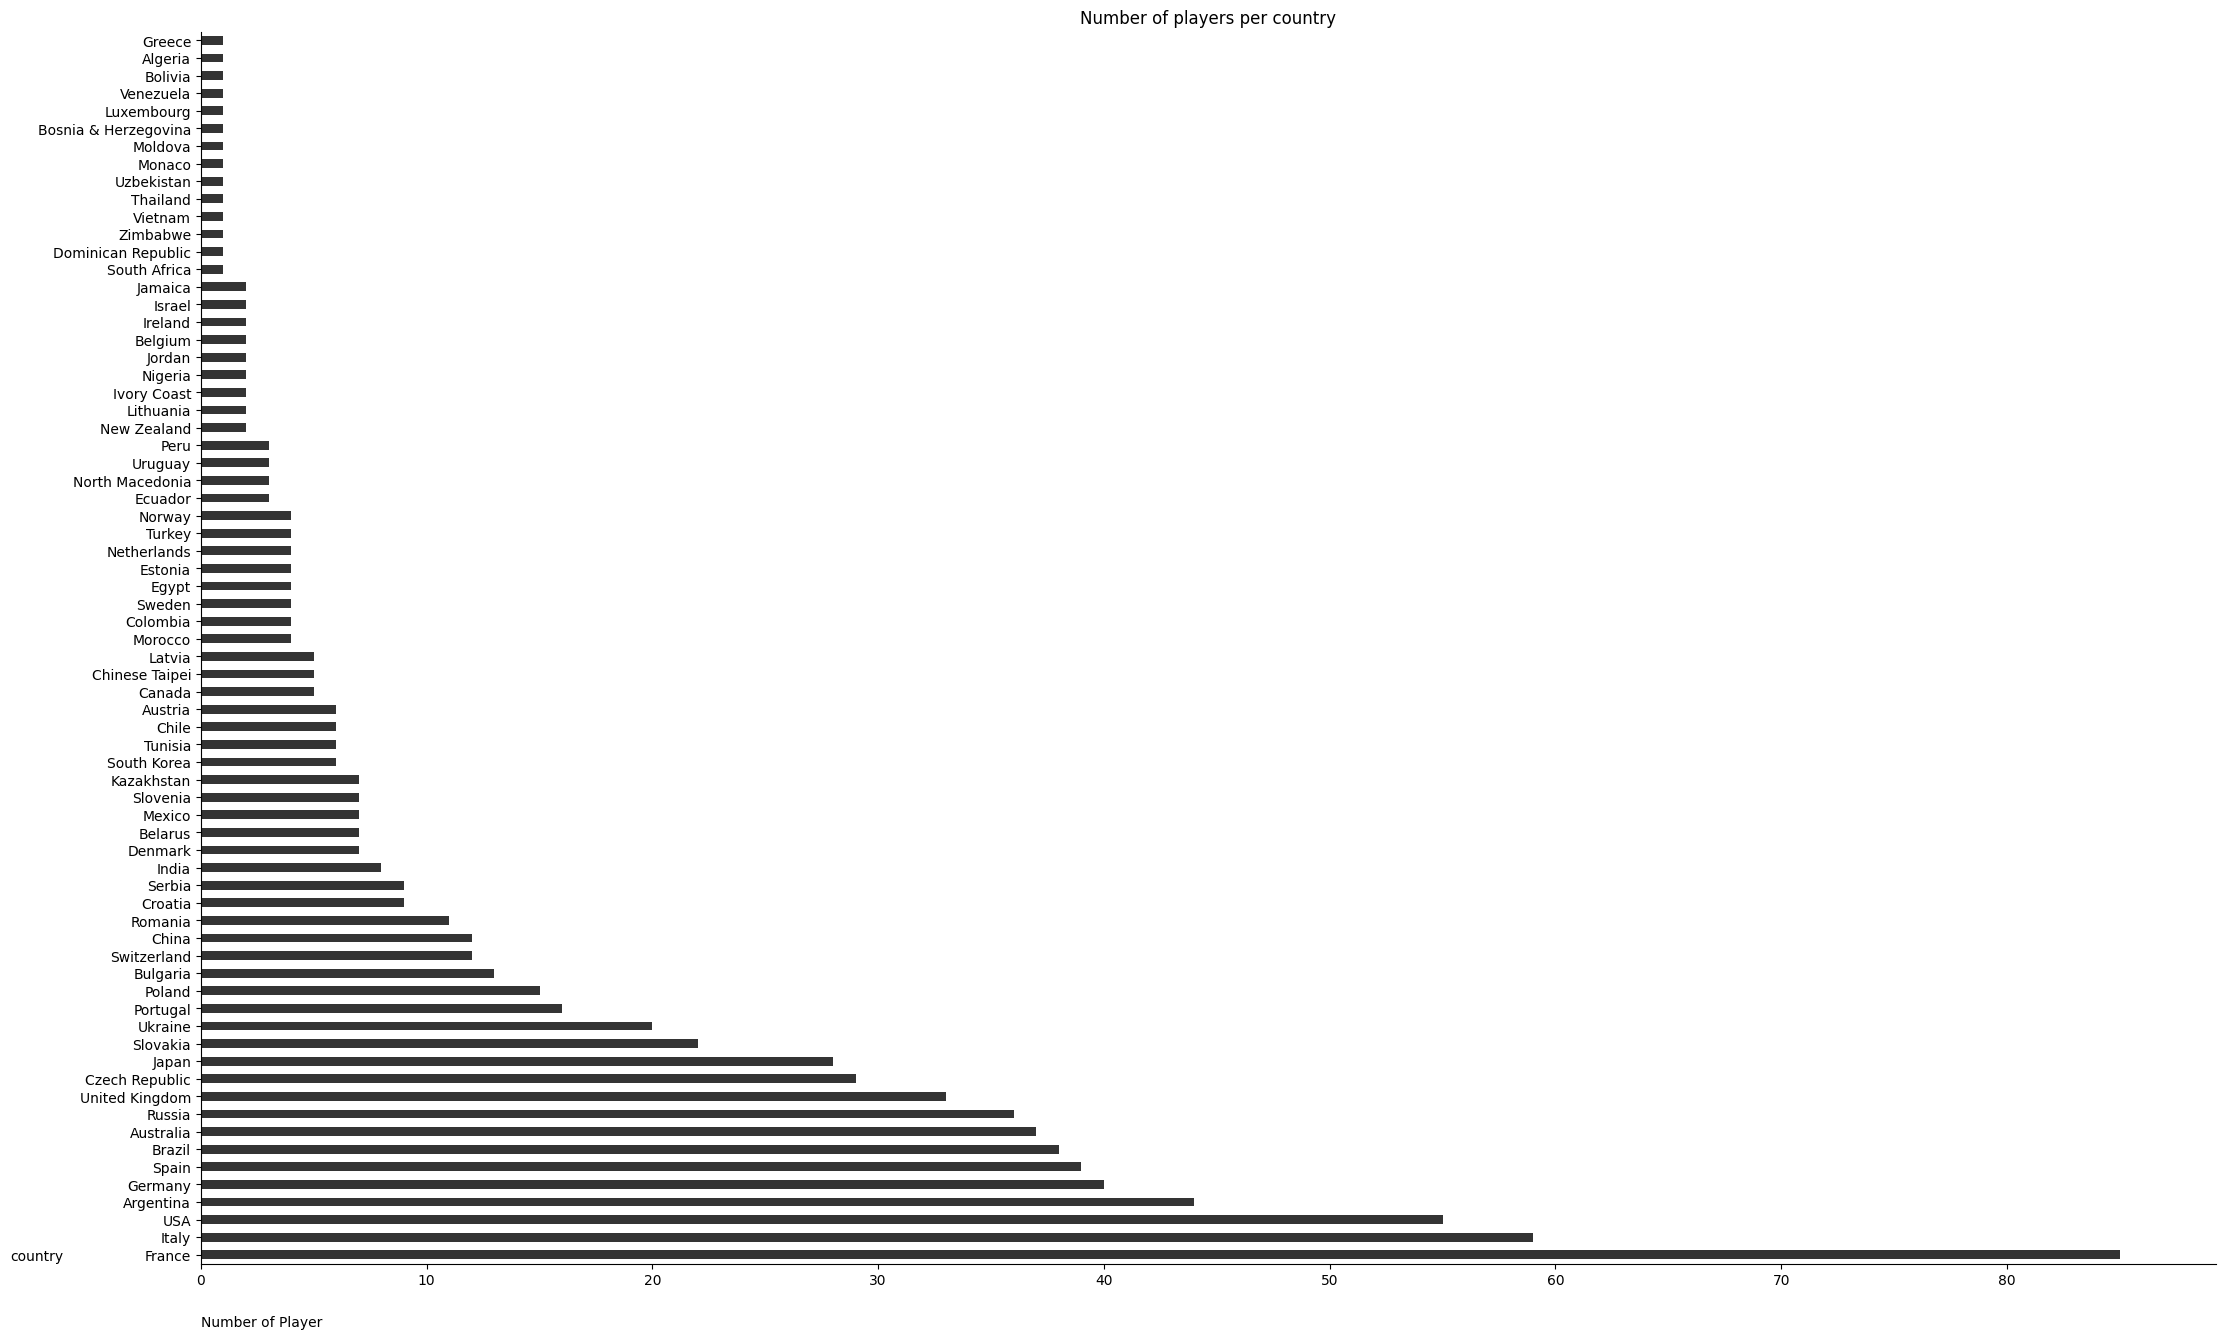

In [89]:
plt.figure(figsize=(26,16))
players_count.plot(kind='barh', color= '#343434')
plt.title('Number of players per country')
plt.xticks(rotation=360)
plt.ylabel('country' ,  loc='bottom' , rotation=360 , labelpad=20)
plt.xlabel('Number of Player' ,  loc='left' , rotation=360 , labelpad=20)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(axis='y' , linestyle=' ')
plt.show()

 - **Analyze:**
  * We have 70 countries in our tables, the largest number of player is France with 85 players . And Greece has the least number of players with 1 person. On average,we can conclude that about half of the countries have 11 players . Considering the average of 11.7 & the interquartile range (difference between the first and third quartie) of 10, we can understand that the number of tennis players in different countries is relatively different. According to the value of the distance between quartiles, it is clear that the distribition of the number of players between countries is relatively scattered. Therefore, some countries have a large number of tennis players while other countries have fewer players. This information shows that tennis is more popular in some countries and they invest more to attract people to this aport,and in contrast to some countries , they do not pay much attention to this sport. This issue can be due to various reasons such as cultural, economic or the field of sports development in those countries.

<font color='cyan'>Q7: Average height and weight of tennis players in different countries</font>

Load Data

In [ ]:
main_path = 'data/raw_match_parquet/'
away_df = load_dataframe(main_path, 'away_team_11*.parquet')
home_df = load_dataframe(main_path, 'home_team_11*.parquet')

Clean Data

In [29]:
all_players = pd.concat([home_df, away_df])[['player_id','country','weight','height']].drop_duplicates().dropna()

Result

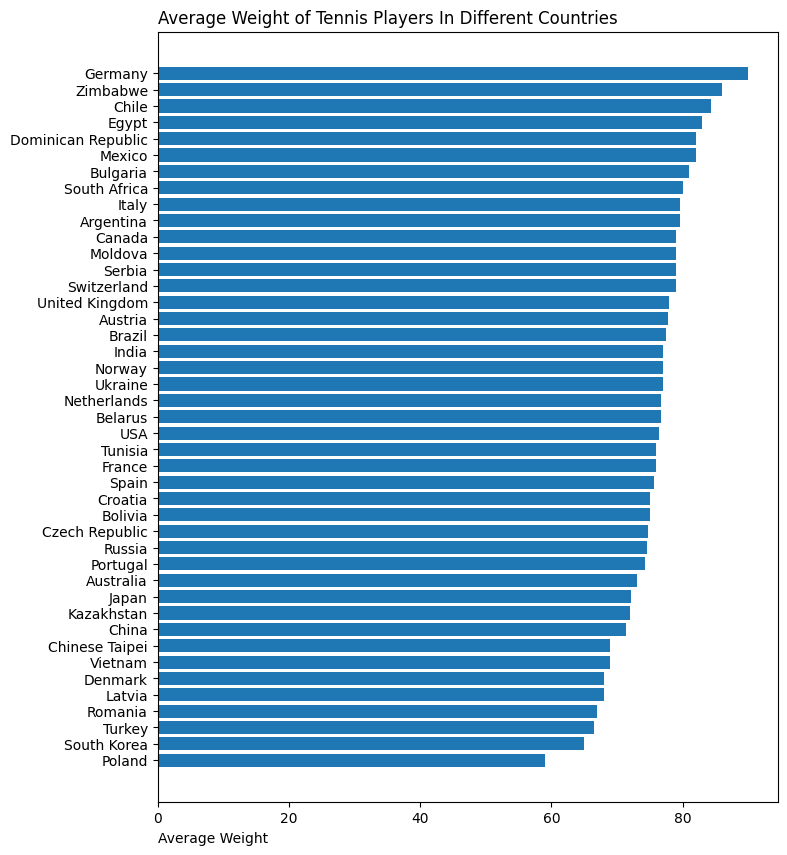

In [30]:
mean_weight = all_players.groupby(
    'country')['weight'].mean().sort_values()

plt.figure(figsize=(8, 10))
plt.barh(mean_weight.index, mean_weight.values)
plt.xlabel('Average Weight',loc='left');
plt.title('Average Weight of Tennis Players In Different Countries',loc='left');

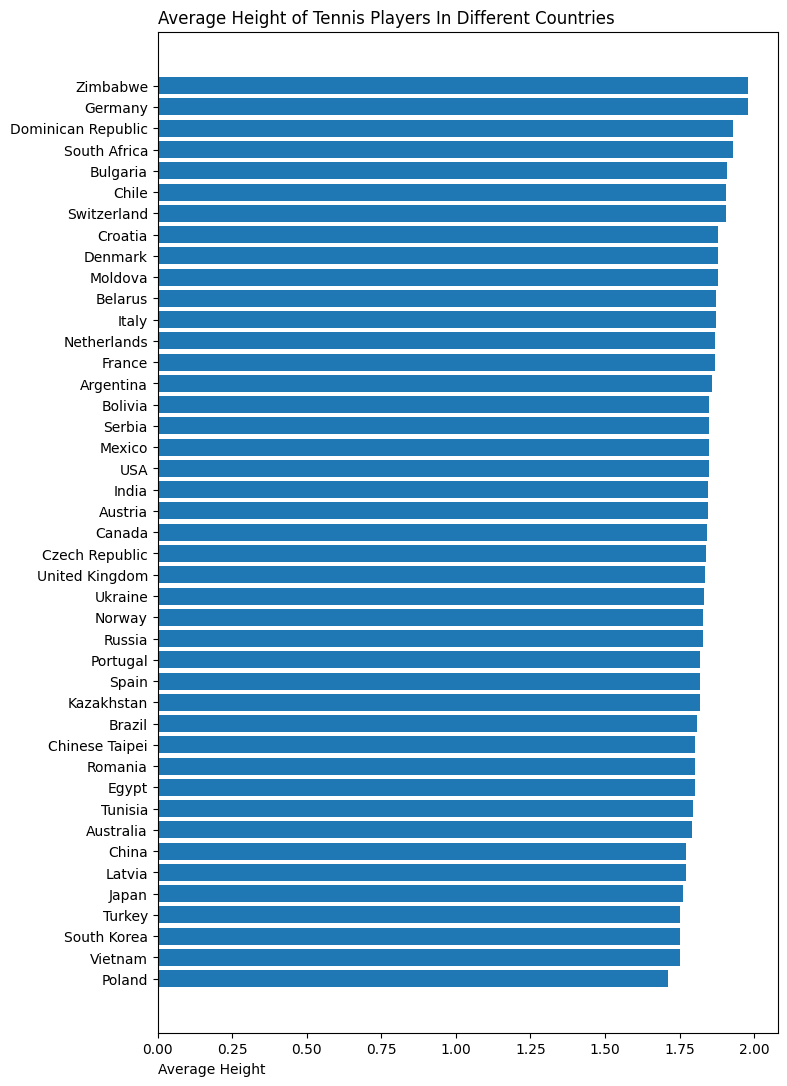

In [31]:
mean_height = all_players.groupby(
    'country')['height'].mean().sort_values()
plt.figure(figsize=(8, 13))
plt.barh(mean_height.index, mean_height.values)
plt.xlabel('Average Height',loc='left');
plt.title('Average Height of Tennis Players In Different Countries',loc='left');

As can be seen in the above graphs, the average weight of German players is higher than other countries. In contrast, Polish players have the lowest average weight compared to other athletes.

In terms of average height, Zimbabwean and German athletes are the tallest compared to tennis players from other countries. It is worth to mention that the Zimbabwean athletes have the second rank in terms of average weight.

<font color = '#00ffff'>Q8 : What type of tennis surface does each stadium have?</font>

In [42]:
# Load DataFrames
main_path = 'data/raw_match_parquet/'
venue_df = load_dataframe(main_path, 'venue_*.parquet')
tournament_df = load_dataframe(main_path, 'tournament_*.parquet')

**Hints:**
  * In this question, we use 'stadium', 'ground_type' columns from ["MatchVenueInfo" , "MatchTournamentInfo"] tables and also, Here we show what type of surface each stadium has

**Data Cleaning:**
  * In this step, we clear the data that have null values

In [43]:
# Merge 'venue_df' and 'home_dftournament_df' DataFrames
venue_to_tornament = pd.merge(venue_df, tournament_df, on='match_id')
# Drop duplicates
venue_to_tornament = venue_to_tornament[['country','stadium','ground_type']].drop_duplicates()
# Drop null values
venue_to_tornament = venue_to_tornament.dropna()

In [44]:
venue_to_tornament

,country,stadium,ground_type
0,Colombia,Cancha Central,Red clay
3,Portugal,Court Central,Red clay
4,USA,Center Court,Hardcourt outdoor
7,France,Central Arena,Hardcourt indoor
10,Japan,Centre Court,Hardcourt outdoor
...,...,...,...
591,France,Court 1 - Europe,Hardcourt indoor
626,Qatar,Court 4,Hardcourt outdoor
628,Qatar,Court 3,Hardcourt outdoor
630,Qatar,Court 6,Hardcourt outdoor


- **Analyze:**
 * There are 121 stadiums in this tournament, most of them are Hardcourt outdoor.Also, in this tournament, there is only one field of Carpet indoor type, which is related to Court 1 stadium in France.

 <font color = '#00ffff'> Q9: The relationship between the type of field and the duration of the game</font>

In [90]:
main_path = 'data/raw_match_parquet'
time_df = load_dataframe(main_path, 'time_*.parquet')
tournament_df = load_dataframe(main_path, 'tournament_*.parquet')

In [91]:
merged_df = pd.merge(time_df[['match_id', 'period_1', 'period_2', 'period_3','period_4','period_5']] , tournament_df[['match_id', 'ground_type']], on='match_id')
merged_df = merged_df.dropna(how='all')

The only way to not lose data in solving this question is to remove null data if all rows have null data. Also, because agg functions have been used in solving the question, these functions themselves apply the operations that we do in the data cleaning stage to the table and then solve it.

 **Definition:**
  - synthetic outdoor :

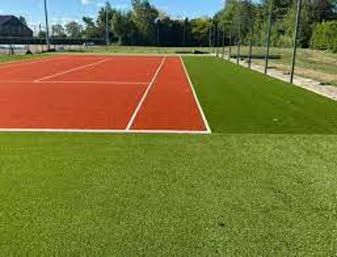

  - carpet indoor :

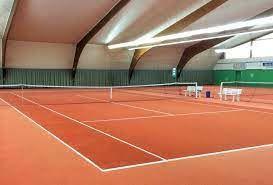

  - red clay :

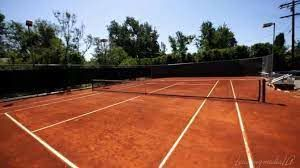

  - hardcourt :

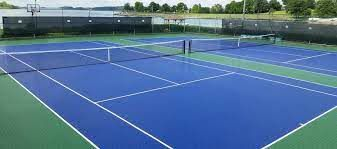

 **Hints:**
 1. In this question , we use 'match_id', 'period_1', 'period_2', 'period_3','period_4','period_5' columns  of ['MatchTimeInfo'] table  & 'match_id', 'ground_type' columns of ['MatchTournamentInfo'] table.

In [92]:
merged_df = pd.merge(time_df[['match_id', 'period_1', 'period_2', 'period_3','period_4','period_5']] , tournament_df[['match_id', 'ground_type']], on='match_id')
result_df = merged_df.groupby('ground_type').sum().reset_index()
result_df['total_duration'] = result_df.apply(lambda row: row['period_1'] + row['period_2'] + row['period_3'] + row['period_4'] + row['period_5'] , axis=1)
result_df['total_duration'] = result_df['total_duration'].apply(lambda x: x / 3600)
result_df

,ground_type,match_id,period_1,period_2,period_3,period_4,period_5,total_duration
0,Carpet indoor,35092940,6374,7861,0,0,0,3.954167
1,Hardcourt indoor,982556582,210569,222674,37887,0,0,130.869444
2,Hardcourt outdoor,3930784487,307204,321182,121886,0,0,208.408889
3,Red clay,3779001758,285955,308403,88055,0,0,189.559167
4,Synthetic outdoor,11698735,1357,455,0,0,0,0.503333


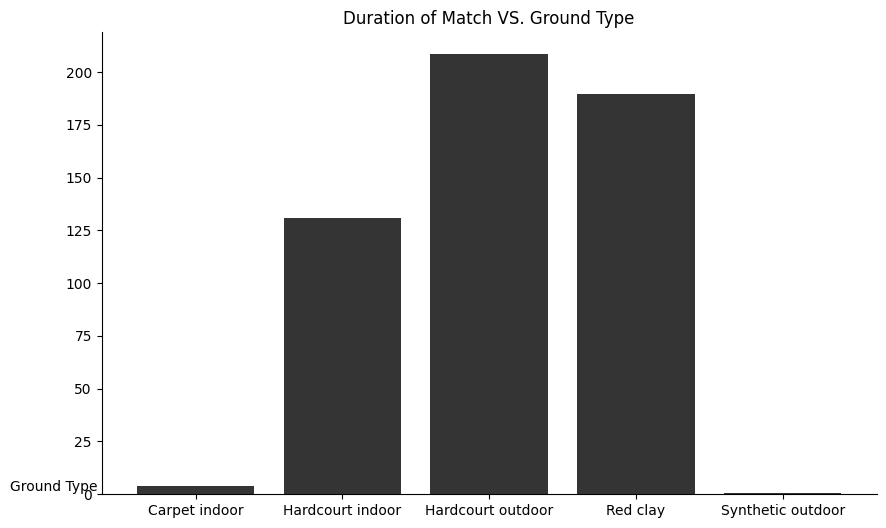

In [93]:
ground_types = result_df['ground_type']
total_duration = result_df['total_duration']

plt.figure(figsize=(10,6))
plt.bar(ground_types , total_duration , color='#343434')
plt.xticks(rotation=360)
plt.ylabel('Ground Type' ,  loc='bottom' , rotation=360 , labelpad=40)
plt.title('Duration of Match VS. Ground Type')
plt.grid(axis='y' , linestyle=' ' , alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

 - **Analyze:**
  * With indoor tennis, you don’t have to deal with the wind or sun. Courts are flat and smooth with no cracks – a perfect environment to make it just about the competitors. Outdoors is so much different. The ball speed is slower due to the ball picking up dirt and moisture. Wind plays a big part, as well as temperature.
  Here on the synthetic ooutdoor , we have had the shortest duration of the match, which can be concluded that the height of the artificial grass here has increased the speed of the game. After the synthetic court , the carpet indoor is the fastest tennis courts because the materials used in its surface are various textile or polymer materials that reduce the friction between the shoes and the court and increase the player's speed.
  Red clay, is  the slowest of the surfaces because the ball "grabs” due to the texture of the clay.Also, because it is more difficult to throw or serve balls at this level, the match takes longer. But because the surface of this court is more slippery than the hardcourt , the duration of the race on this court is less than that of the hard court.
  Also  in the other hand , at hardcourt outdoor , because the weather was not good and the wind speed was low, which led to a decrease in the speed of the ball , and maybe the sunlight was annoying for the players and they didn't dominate the playing field. Therefore, the duration of the match on the hardcourt outdoor was longer than the hardcourt indoor. 

<font color = '#00ffff'>Q10 : Which country has the most professional players?</font>

In [ ]:
# Load DataFrame
main_path = 'data/raw_match_parquet/'
away_df = load_dataframe(main_path, 'away_team_11*.parquet')
home_df = load_dataframe(main_path, 'home_team_11*.parquet')

**Hints:**
  * In this question, we use 'country', 'full_name', 'turned_pro', 'player_id' columns from ["MatchAwayTeamInfo" , "MatchHomeTeamInfo] tables and also, we received the current date and separated the year from the date and got it from the difference 'turned_pro' column and the largest number of professional players are displayed.

**Data Cleaning:**
  * In this step, we clear the data that have null values

In [48]:
# Concatenate 'away_df' and 'home_df' DataFrames
concat_away_home = pd.concat([away_df,home_df], ignore_index=True)  
# Drop duplicates
concat_away_home = concat_away_home[['country','full_name', 'turned_pro','player_id']].drop_duplicates()
# Drop null values
concat_away_home = concat_away_home.dropna()

           country  turned_pro
0        Argentina           1
1           Turkey           1
2          Tunisia           1
3      Switzerland           1
4     South Africa           1
5           Norway           1
6          Moldova           1
7           Latvia           1
8        Venezuela           1
9            India           1
10           Egypt           1
11        Zimbabwe           1
12        Bulgaria           1
13         Germany           2
14           Chile           2
15          Mexico           2
16          Canada           2
17        Portugal           2
18          Poland           3
19  Chinese Taipei           3
20  United Kingdom           3
21           China           3
22     Netherlands           3
23         Belarus           3
24          Brazil           3
25         Ukraine           4
26         Austria           4
27      Kazakhstan           4
28           Japan           4
29           Spain           4
30  Czech Republic           6
31      

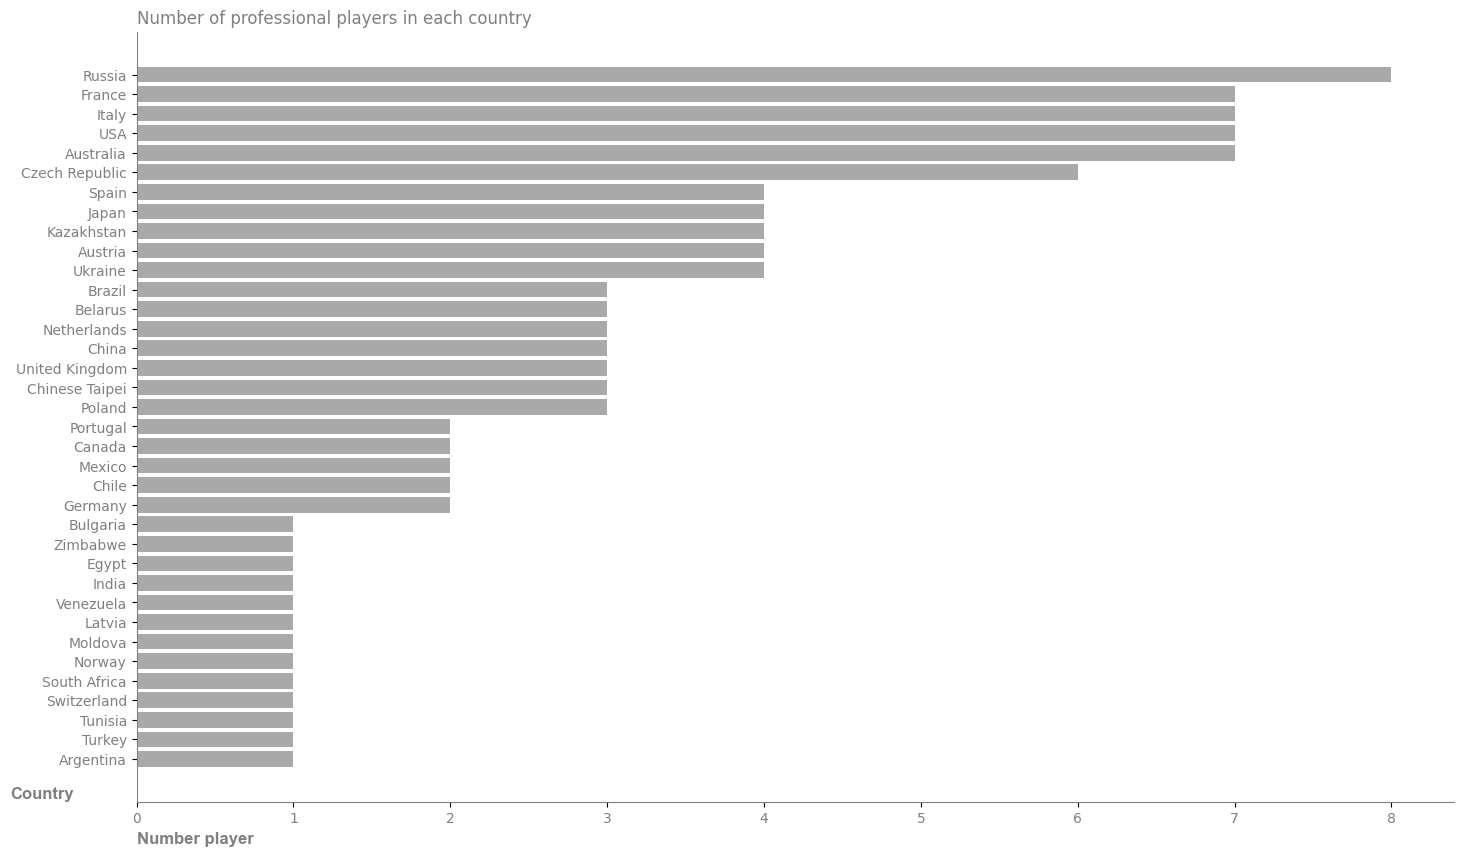

In [49]:

# Get the current date and extract the year
get_date = pd.Timestamp.now()
get_date_df = pd.DataFrame({'date': [get_date.date()]})
get_date_df['date'] = pd.to_datetime(get_date_df['date'])
get_date_df['year'] = get_date_df['date'].dt.year

# Convert 'turned_pro' column to int64 and calculate the difference with the current year
concat_away_home['turned_pro'] = concat_away_home['turned_pro'].astype(np.int64)
concat_away_home['turned_pro'] = get_date_df['year'].values - concat_away_home['turned_pro']


n_player_country_professional = concat_away_home.groupby('country', as_index=False)['turned_pro'].count().sort_values(by='turned_pro',ascending=True).reset_index(drop=True)
print(n_player_country_professional)

#plot bar
plt.figure(figsize=(17,10))
plt.barh(n_player_country_professional['country'], n_player_country_professional['turned_pro'], color='darkgray')
plt.xlabel('Number player', loc='left',  color='gray', fontdict={'family': 'Arial', 'size':12, 'weight':'bold'})
plt.ylabel('Country', loc='bottom', rotation=360, color='gray', fontdict={'family': 'Arial', 'size':12, 'weight':'bold'})
plt.gca().spines[['bottom','left']].set_color('gray')
plt.gca().spines[['top','right']].set_visible(False)
plt.xticks(color='gray')
plt.yticks(color='gray')
plt.title('Number of professional players in each country', loc='left', color='gray')
plt.show()


- **Analyze:**
 * In this tournament, 35 countries had professional players, among them, 13 countries have only one professional player, 5 countries have two professional players, and 6 countries have three professional players each. On the other hand,
 Russia has the largest number of professional players with 8 professional players, followed by France, Italy and the United States, each with 7 professional players.

<font color = '#00ffff'>Q11 : How many games by month?</font>

In [50]:
# Load dataFrame
main_path = 'data/raw_match_parquet/'
event_df = load_dataframe(main_path, 'event_*.parquet')

**Hints:**
  * In this question, we use 'match_id','start_datetime' columns from ["MatchEventInfo"] table and also, We convert timestamp to datetime to separate the months played

**Data Cleaning:**
  * In this step, we clear the data that have null values

In [51]:
# split two column from event_df and drop duplicates
month_play = event_df[['match_id','start_datetime']].drop_duplicates()
month_play = month_play.dropna()
month_play.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   match_id        764 non-null    int64
 1   start_datetime  764 non-null    int64
dtypes: int64(2)
memory usage: 12.1 KB


   start_datetime  match_id
0               9        22
1              10       742


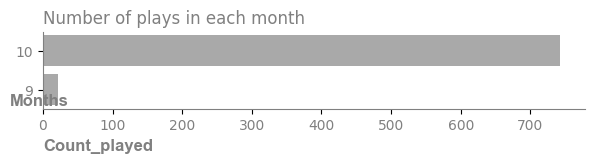

In [52]:

# convert timestamp to datetime
month_play['start_datetime'] = pd.to_datetime(month_play['start_datetime'],unit='s')
# split month from datetime
month_play['start_datetime'] = month_play['start_datetime'].dt.month
# count match in each month
n_month_play = month_play.groupby('start_datetime',as_index=False)['match_id'].count()
print(n_month_play)

# Bar plot
plt.figure(figsize=(7,1))
plt.barh(n_month_play['start_datetime'], n_month_play['match_id'], color='darkgray')
plt.xlabel('Count_played', loc='left',  color='gray', fontdict={'family': 'Arial', 'size':12, 'weight':'bold'})
plt.ylabel('Months', loc='bottom', rotation=360, color='gray', fontdict={'family': 'Arial', 'size':12, 'weight':'bold'})
plt.gca().spines[['bottom','left']].set_color('gray')
plt.gca().spines[['top','right']].set_visible(False)
plt.xticks(color='gray')
plt.yticks(color='gray')
plt.title('Number of plays in each month', loc='left', color='gray')
plt.show()


- **Analyze:**
 * It can be said that the majority of the games were played in October, 742 games were played, and 22 games were played in September, in total, all the games were played in September and October.

<font color = 'cyan'>Q12: How many times has each tennis player participated as a guest and how many times as a host in different tournaments?</font>

In [ ]:
main_path = 'data/raw_match_parquet/'
away_df = load_dataframe(main_path , 'away_team_11*.parquet')
home_df = load_dataframe(main_path , 'home_team_11*.parquet')
tournament_df = load_dataframe(main_path , 'tournament_*.parquet')

In [47]:
merged_data_away = pd.merge(tournament_df , away_df , on='match_id')
merged_data_away = (merged_data_away[['tournament_id' , 'name' ,'player_id']]).dropna(how= 'all')
merged_data_home = pd.merge(tournament_df , home_df  ,on='match_id')
merged_data_home = (merged_data_home[['tournament_name' ,'name' ,'player_id']]).dropna(how= 'all')

In [48]:
away_count = merged_data_away.groupby(['name' , 'player_id'])['tournament_id'].count().sort_values()
home_count = merged_data_home.groupby(['name' ,'player_id'])['tournament_name'].count().sort_values()
all_count =pd.merge(home_count ,away_count, how='outer' ,on= 'name').replace(np.nan, 0)
all_count.rename({"tournament_name": "home" , "tournament_id": "away"}, axis="columns")

,home,away
name,,
Đaković M.,1.0,0.0
Özgen P.,1.0,0.0
Tajima N.,1.0,0.0
Langmo C.,1.0,0.0
Lea Ma.,1.0,0.0
...,...,...
Sakamoto P.,0.0,2.0
Puskar S.,0.0,2.0
Nad P.,0.0,3.0


According to three tables <font color = 'yellow'>tournament_df , away_score_df , home_score_df</font> and columns <font color = 'yellow'>name , tournament_id , tournament_name ,</font>  We can get the following results :

1.There are people who have home games but no away games. And vice versa

2.There are people who have both home games and away games

3.People like Derdoy F. , Kalina V. , Nad P. have played the most games, but all of them were away games.

4.People like Đaković M. , Özgen P. , Tajima N. , Langmo C. , ..... have played the fewest games (one game) but that game was at home.

5.There is no player whose number of home games and number of away games are both zero

<font color='cyan'>Q13: In how many games did tie break happen and what was the rank of the players in that match?
Which tennis player ended up winning the match?</font>

**Definitions**:
<ul>
<li><b>Tie-Break</b>: A tie break in tennis occurs when the score in a set reaches 6-6. Instead of playing a regular game to determine the winner of the set, a tie break is played. In a tie break, the first player to reach 7 points with a margin of two points wins the tie break and the set. The tie break is played with each player taking turns to serve, with the first player serving one point and the second player serving the next two points, and so on until the tie break is won.
</li>
</ul>

Load Data

In [4]:
main_path = 'data/raw_match_parquet/'
home_score_df = load_dataframe(main_path, 'home_team_score_*.parquet')
away_score_df = load_dataframe(main_path, 'away_team_score_*.parquet')
away_df = load_dataframe(main_path, 'away_team_11*.parquet')
home_df = load_dataframe(main_path, 'home_team_11*.parquet')
event_df = load_dataframe(main_path, 'event_*.parquet')

C:\Users\Mohammad\AppData\Local\Temp\ipykernel_6164\1872257358.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_parquet(file)
C:\Users\Mohammad\AppData\Local\Temp\ipykernel_6164\1872257358.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_parquet(file)


Clean Data

In [5]:
home_score_df = home_score_df[~home_score_df.loc[:,'period_1_tie_break':'period_5_tie_break'].isnull().all(axis=1)]
away_score_df = away_score_df[~away_score_df.loc[:,'period_1_tie_break':'period_5_tie_break'].isnull().all(axis=1)]
event_df = event_df[event_df['winner_code'].notnull()]
away_df = away_df[away_df[['current_rank','country']].notnull().all(axis=1)]
home_df = home_df[home_df[['current_rank','country']].notnull().all(axis=1)]

Result

In [13]:
home_score_df['n_home_tie'] = home_score_df.loc[:,'period_1_tie_break':'period_5_tie_break'].sum(axis=1)
away_score_df['n_away_tie'] = away_score_df.loc[:,'period_1_tie_break':'period_5_tie_break'].sum(axis=1)
all_games = pd.merge(home_score_df,away_score_df,how='outer',on='match_id',suffixes=['_home','_away'])[['match_id','n_home_tie','n_away_tie']]
all_games['n_total_tie'] = all_games.loc[:,'n_home_tie':'n_away_tie'].sum(axis=1)
all_games = pd.merge(all_games,home_df[['match_id','name','gender','turned_pro','current_rank','country']],on='match_id')
all_games = pd.merge(all_games, away_df[['match_id','name','gender','turned_pro','current_rank','country']],\
                      on='match_id',suffixes=['_home','_away'])
all_games = pd.merge(all_games,event_df[['match_id','winner_code']])
all_games.sort_values('n_total_tie',ascending=False)

,match_id,n_home_tie,n_away_tie,n_total_tie,name_home,gender_home,turned_pro_home,current_rank_home,country_home,name_away,gender_away,turned_pro_away,current_rank_away,country_away,winner_code
0,11674105,22,15,37,Korda S.,M,None,24,USA,Međedović H.,M,None,113,Serbia,1
10,11697216,10,15,25,Gentzsch T.,M,None,641,Germany,Stewart H.,M,None,651,United Kingdom,2
11,11698055,13,8,21,Yang Y.,F,None,212,Chinese Taipei,Ma Y.,F,None,218,China,2
8,11697120,8,10,18,Sherif M.,F,None,59,Egypt,Kasatkina D.,F,2014,18,Russia,2
3,11675448,7,9,16,Etcheverry T.,M,None,30,Argentina,Ruud C.,M,2015,11,Norway,2
18,11701537,7,9,16,Mohamed H.,F,None,1280,France,Melnikova M.,F,2006,525,Russia,2
6,11697113,6,8,14,Kvitová P.,F,2006,14,Czech Republic,Wang Xiy.,F,2018,69,China,1
1,11674112,8,6,14,Mannarino A.,M,2004,22,France,Rodionov J.,M,2017,115,Austria,1
22,11703443,7,5,12,Salazar D.,M,None,1338,Colombia,Kalina V.,M,None,1454,Czech Republic,2
16,11699186,5,7,12,Falkner Z.,F,None,429,Slovenia,Mair L.,F,None,746,Italy,1


As can be seen in the above table, the highest number of tie breaks occurred in the men's match between Korda S. and Međedović H. from the United States and Serbia, respectively. These two players have shown a very close game. While the difference in the rank of these two players is huge. In this match, the host's tennis player, Korda S., finally won.
In the women's competition, there were tie breaks between Yang Y. and Ma Y. from Chinese Taipei and China. But unlike the men's match, the ranks of these two tennis players are close to each other. In this match, Chinese tennis player Ma Y. finally won the match.

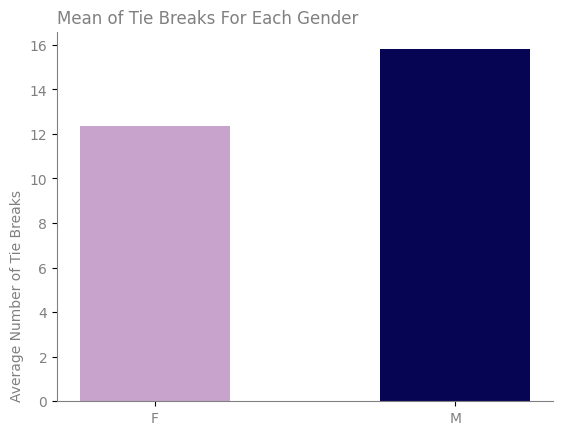

In [11]:
n_gender_tie_breaks = all_games.groupby('gender_home')['n_total_tie'].mean()

plt.figure()
plt.bar(n_gender_tie_breaks.index,n_gender_tie_breaks.values, color=['#c8a3cc','#060554'],width=0.5)
plt.ylabel('Average Number of Tie Breaks',color='gray',loc='bottom')
plt.gca().spines[['bottom','left']].set_color('gray')
plt.gca().spines[['top','right']].set_visible(False)
plt.xticks(color='gray')
plt.yticks(color='gray');
plt.title('Mean of Tie Breaks For Each Gender',loc='left',color='gray');

As can be seen in the graph above, the number of _Tie Breaks_ for men is higher on average than for women, indicating that men's matches are closer compared to women's, and probably the men's matches were longer on average than the women's.

<font color='cyan'>Q14: The ratio of the number of tennis players to the number of stadiums in each country</font>

Load Data

In [32]:
main_path = 'data/raw_match_parquet/'
away_df = load_dataframe(main_path, 'away_team_11*.parquet')
home_df = load_dataframe(main_path, 'home_team_11*.parquet')

C:\Users\Mohammad\AppData\Local\Temp\ipykernel_6164\1872257358.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_parquet(file)
C:\Users\Mohammad\AppData\Local\Temp\ipykernel_6164\1872257358.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_parquet(file)


Clean Data

In [33]:
home_df = home_df[['player_id','country']].dropna()
away_df = away_df[['player_id','country']].dropna()

Result

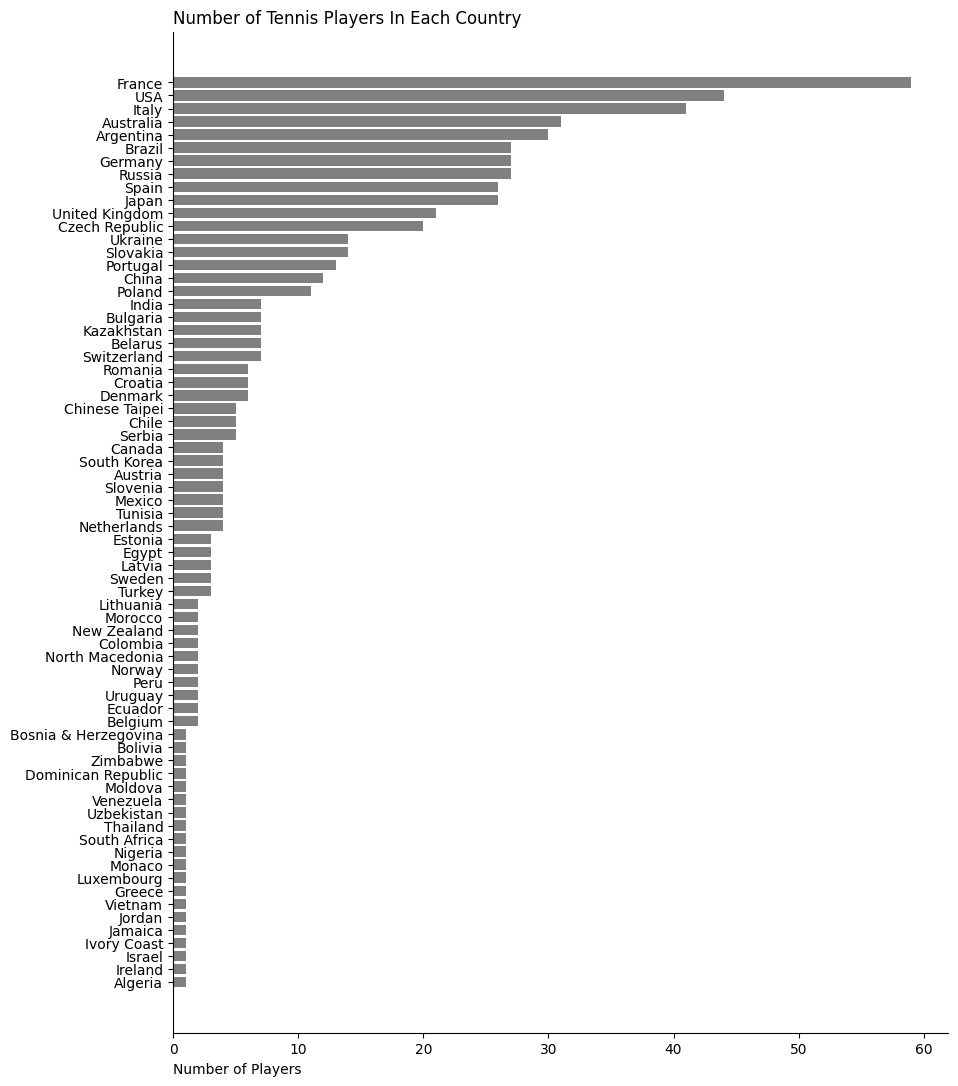

In [34]:
all_players = pd.concat([home_df,away_df])[['player_id','country']].drop_duplicates()
n_player_country = all_players.groupby('country')['player_id'].count().sort_values()

plt.figure(figsize=(10,13))
plt.barh(n_player_country.index,n_player_country.values, color='gray');
plt.xlabel('Number of Players',loc='left');
plt.gca().spines[['top','right']].set_visible(False)
plt.title('Number of Tennis Players In Each Country',loc='left');

According to this chart, France has the largest number of tennis players by a large margin, and as mentioned before, this country also has the largest number of stadiums. Meanwhile, Tunisia, which has the same number of stadiums as France, has far fewer tennis players than France.

Load Data

In [40]:
main_path = 'data/raw_match_parquet/'
venue_df = load_dataframe(main_path, 'venue_*.parquet')

Clean Data

In [41]:
venue_df = venue_df[['stadium','country']].dropna()

Result

,country,player_id,stadium,ratio
1,Egypt,3,68,0.044118
2,Tunisia,4,79,0.050633
3,Austria,4,49,0.081633
5,Croatia,6,38,0.157895
7,Bulgaria,7,36,0.194444
8,China,12,60,0.200000
9,Portugal,13,45,0.288889
13,Argentina,30,75,0.400000
11,Spain,26,64,0.406250
14,Australia,31,57,0.543860


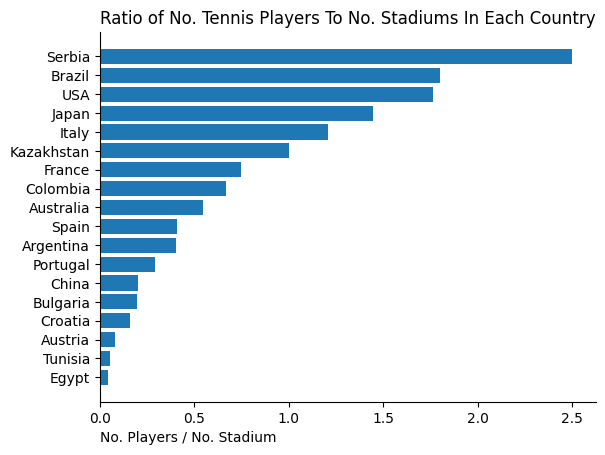

In [51]:
# n_player_country from previous question.
n_stadium_country = venue_df.groupby('country')['stadium'].count()
player_stadium = pd.merge(n_player_country,n_stadium_country,on='country').reset_index()

player_stadium['ratio'] = player_stadium['player_id'] / player_stadium['stadium']
player_stadium = player_stadium.sort_values('ratio')

plt.figure()
plt.barh(player_stadium['country'],player_stadium['ratio'])
plt.xlabel('No. Players / No. Stadium',loc='left');
plt.gca().spines[['top','right']].set_visible(False)
plt.title('Ratio of No. Tennis Players To No. Stadiums In Each Country',loc='left');

From the above graph, it can be seen that Serbia has a large number of players compared to the number of its stadiums. In fact, there is only one stadium for every two tennis players in this country. On the other hand, Egypt and Tunisia have very few tennis players despite the large number of stadiums.